<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# **Project 2: Ames Housing Data Competition**

# **Part 1** - Data Cleaning and Exploratory Data Analysis

## **Problem Statement** - Kaggle Challenge

Analyze the Ames Housing dataset to develop a machine learning model that accurately predicts the sale price of single-family homes in Ames, Iowa. This regression model will be a valuable tool for real estate professionals, investors, and homeowners in the Ames area. Provide insights into factors influencing housing prices and recommedations that facilitate informed decision-making.

Success evaluation:
> - Accuracy: a low Root Mean Squared Error (RMSE), indicates the model's ability to predict sale prices close to the true values.
> - Interpretability: Identifying important variables and metrics that influence sale price through feature engineering (one-hot encoding), which provide valuable insights to stakeholders.
   
Candidate Models:
> - Linear Regression: Baseline model for understanding linear relationships.
> - Ridge Regression: L2 regularization to address multicollinearity and improve generalization in model.
> - Lasso Regression: L1 regularization for feature selection and interpretability by shrinking less important coefficients to zero.
> - Elastic Net: Combines L1 and L2 regularization for benefits of both feature selection and reduced variance.

In [5]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [6]:
# load training and test datasets
train_df = pd.read_csv('../datasets/train.csv')
test_df = pd.read_csv('../datasets/test.csv')

In [7]:
# display the first few rows of training DataFrame
print("Training Data Overview:")
train_df.head()

Training Data Overview:


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
print("\nTest Data Overview:")
test_df.head()


Test Data Overview:


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [9]:
train_df.shape

(2051, 81)

In [10]:
test_df.shape

(878, 80)

In [11]:
# create a dictionary to store total NaN values in each feature
nan_dictionary = dict(train_df.isnull().sum())

In [12]:
# loop through dictionary and display each feature and corresponding NaN value sum
for key, value  in nan_dictionary.items():
    if value > 0:
        print(f'{key}: {value}')
    else:
        pass

Lot Frontage: 330
Alley: 1911
Mas Vnr Type: 1240
Mas Vnr Area: 22
Bsmt Qual: 55
Bsmt Cond: 55
Bsmt Exposure: 58
BsmtFin Type 1: 55
BsmtFin SF 1: 1
BsmtFin Type 2: 56
BsmtFin SF 2: 1
Bsmt Unf SF: 1
Total Bsmt SF: 1
Bsmt Full Bath: 2
Bsmt Half Bath: 2
Fireplace Qu: 1000
Garage Type: 113
Garage Yr Blt: 114
Garage Finish: 114
Garage Cars: 1
Garage Area: 1
Garage Qual: 114
Garage Cond: 114
Pool QC: 2042
Fence: 1651
Misc Feature: 1986


In [13]:
# gpt helped in displaying all dtypes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(train_df.dtypes)

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [14]:
train_df.dtypes.value_counts()

object     42
int64      28
float64    11
Name: count, dtype: int64

In [15]:
train_df['SalePrice']

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

## Addressing NaN values in train and test data

In [17]:
# check for training NaN values
train_nan_value = train_df.isnull().sum()
train_nan_value[train_nan_value > 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type      1240
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [18]:
# define training numerical features
train_numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns
train_numerical_features

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [19]:
# define training categorical features
train_category_features =  train_df.select_dtypes(include=['object']).columns
train_category_features

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [20]:
# replace nan values in training numerical features with mean (average) observation of the column
for feature in train_numerical_features:
    if train_df[feature].isnull().sum() > 0:
        train_df[feature].fillna(train_df[feature].mean(), inplace=True)

In [21]:
# replace nan values in training categorical features with mode (most frequent) observation of the column
for feature in train_category_features:
    if train_df[feature].isnull().sum() > 0:
        mode_val = train_df[feature].mode()[0]  # get first mode value
        train_df[feature].fillna(mode_val, inplace=True)

In [22]:
# verify no more training NaN values
train_nan_value = train_df.isnull().sum()
train_nan_value[train_nan_value > 0]

Series([], dtype: int64)

In [23]:
# check for testing NaN values
test_nan_value = test_df.isnull().sum()
test_nan_value[test_nan_value > 0]

Lot Frontage      160
Alley             820
Mas Vnr Type      535
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           874
Fence             706
Misc Feature      837
dtype: int64

In [24]:
# define testing numerical features
test_numerical_features = test_df.select_dtypes(include=['float64', 'int64']).columns
test_numerical_features

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

In [25]:
# define testing categorical features
test_category_features =  test_df.select_dtypes(include=['object']).columns
test_category_features

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [26]:
# replace nan values in testing numerical features with mean (average) observation of the column
for feature in test_numerical_features:
    if test_df[feature].isnull().sum() > 0:
        test_df[feature].fillna(test_df[feature].mean(), inplace=True)

In [27]:
# replace nan values in training categorical features with mode (most frequent) observation of the column
for feature in test_category_features:
    if test_df[feature].isnull().sum() > 0:
        mode_val = test_df[feature].mode()[0]  # get first mode value
        test_df[feature].fillna(mode_val, inplace=True)

In [28]:
# verify no more testing NaN values
test_nan_value = test_df.isnull().sum()
test_nan_value[test_nan_value > 0]

Series([], dtype: int64)

## Correlation between the 'SalePrice' and numerical features:

In [30]:
train_num_features = train_df._get_numeric_data()

In [31]:
test_num_features  = test_df._get_numeric_data()

In [32]:
train_num_features.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [33]:
train_num_features.describe()
# Sale Price has minimum of $13000 and maximum of $610000

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,21.306357,6742.488909,1.426271,1.104497,30.177889,21.036250,174.021770,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,69.055200,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [34]:
test_num_features.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,2658,902301120,190,69.000000,9142,6,8,1910,1950,0.0,...,440,0,60,112,0,0,0,0,4,2006
1,2718,905108090,90,69.545961,9662,5,4,1977,1977,0.0,...,580,170,0,0,0,0,0,0,8,2006
2,2414,528218130,60,58.000000,17104,7,5,2006,2006,0.0,...,426,100,24,0,0,0,0,0,9,2006
3,1989,902207150,30,60.000000,8520,5,6,1923,2006,0.0,...,480,0,0,184,0,0,0,0,7,2007
4,625,535105100,20,69.545961,9500,6,5,1963,1963,247.0,...,514,0,76,0,0,185,0,0,7,2009


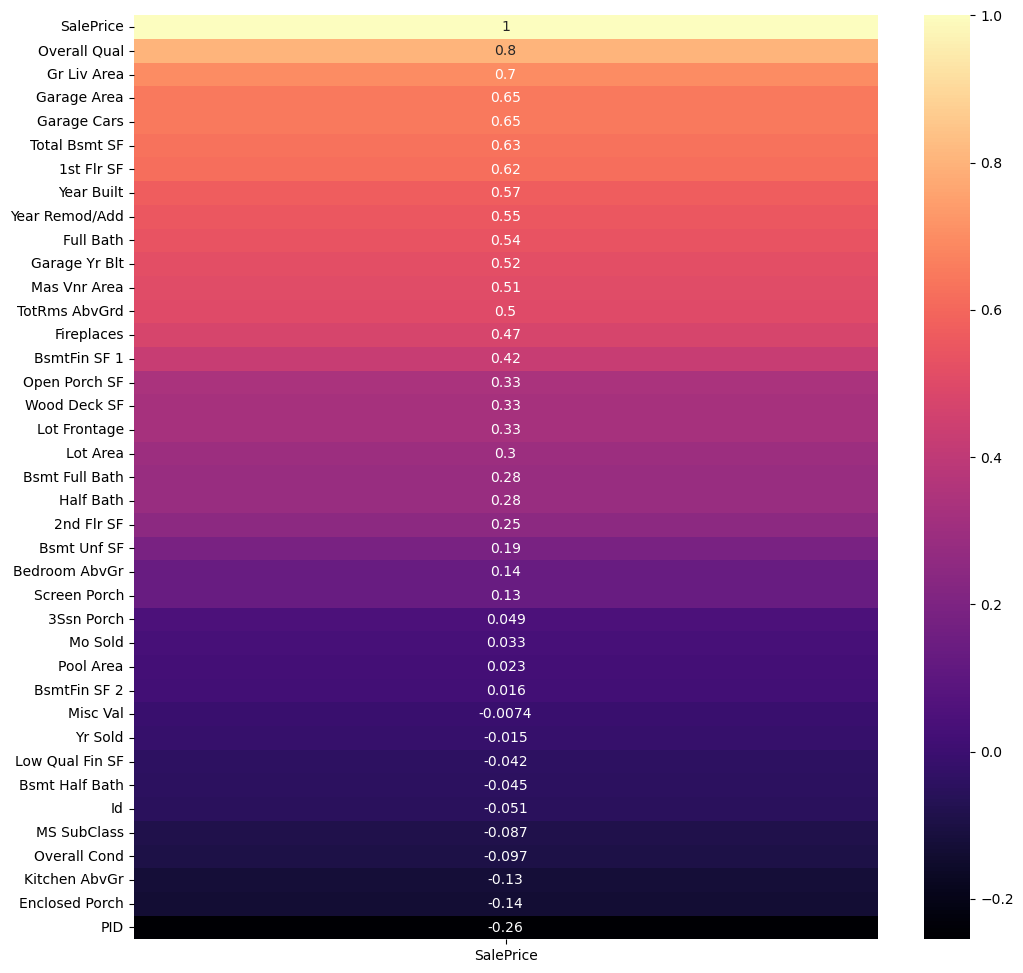

In [35]:
corr_data = train_num_features.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_data[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='magma');

<Axes: >

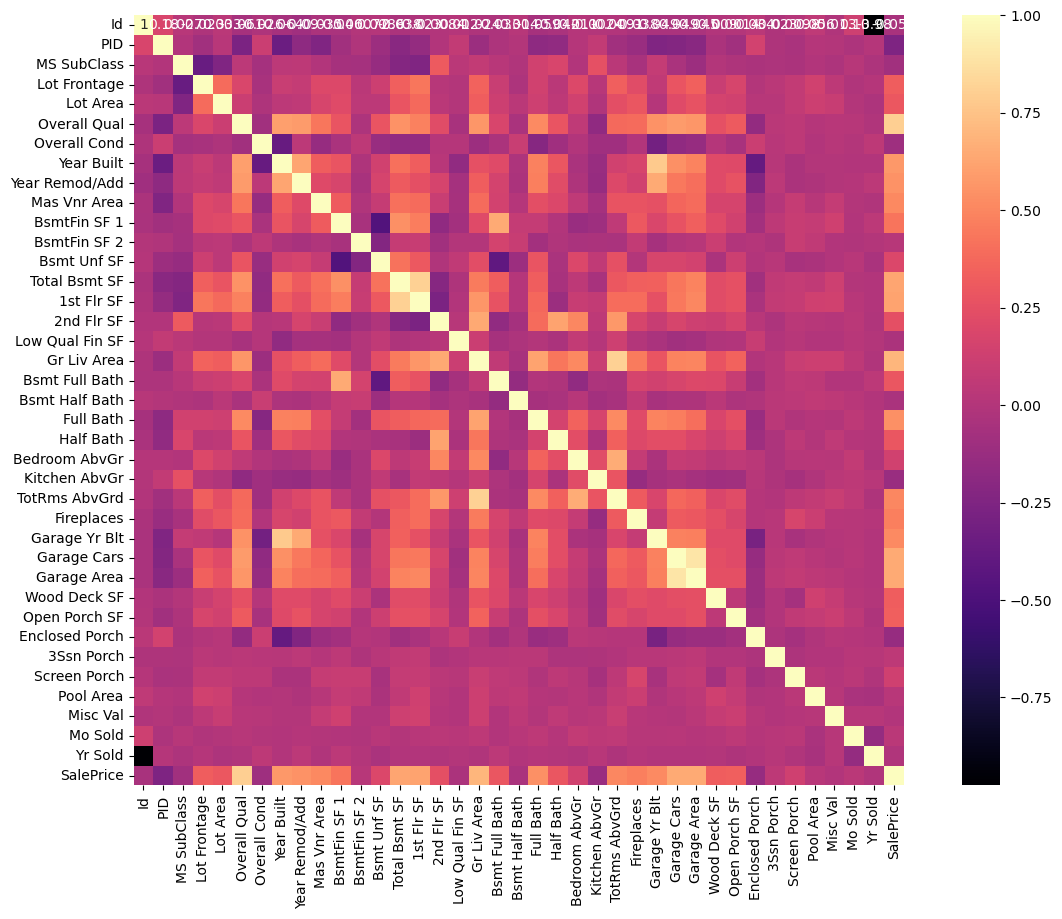

In [36]:
plt.subplots(figsize=(15, 10))
sns.heatmap(corr_data, cmap = 'magma', annot= True, square=True)

C:\Users\mrsha\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

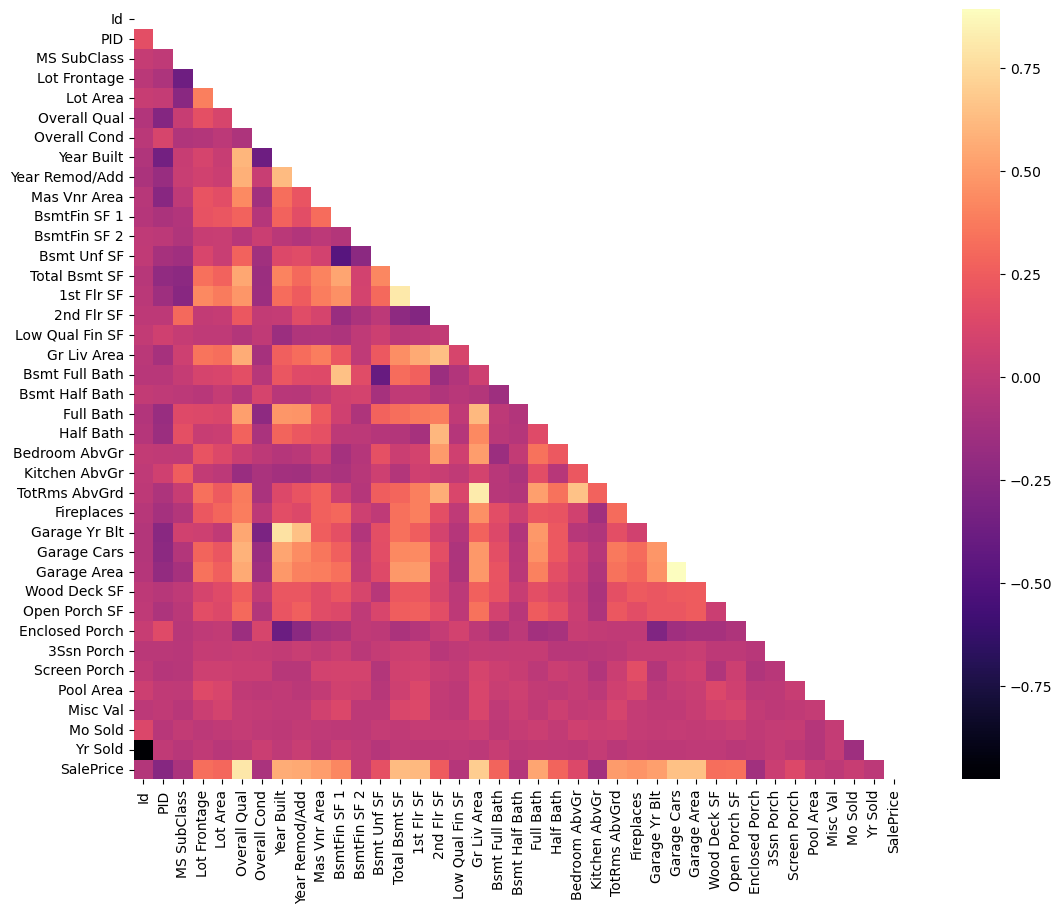

In [37]:
plt.figure(figsize=(15, 10))
mask = np.zeros_like(corr_data)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_data, mask = mask, square = True, cmap = 'magma', annot = True)

In [38]:
# lucky top 13 numerical features that show strongest correlation (exlcuding SalePrice, our target for predictions)
corr_data[['SalePrice']].sort_values(by='SalePrice', ascending=False).head(14)

,SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.650246
Garage Cars,0.648197
Total Bsmt SF,0.628668
1st Flr SF,0.618486
Year Built,0.571849
Year Remod/Add,0.550370
Full Bath,0.537969


## Plots for Numerical Features! From strongest to weakest correlation (lucky 13)

In [40]:
corr_data_df = corr_data[['SalePrice']].sort_values('SalePrice', ascending=False)

### Scatter Plots for Numerical Features

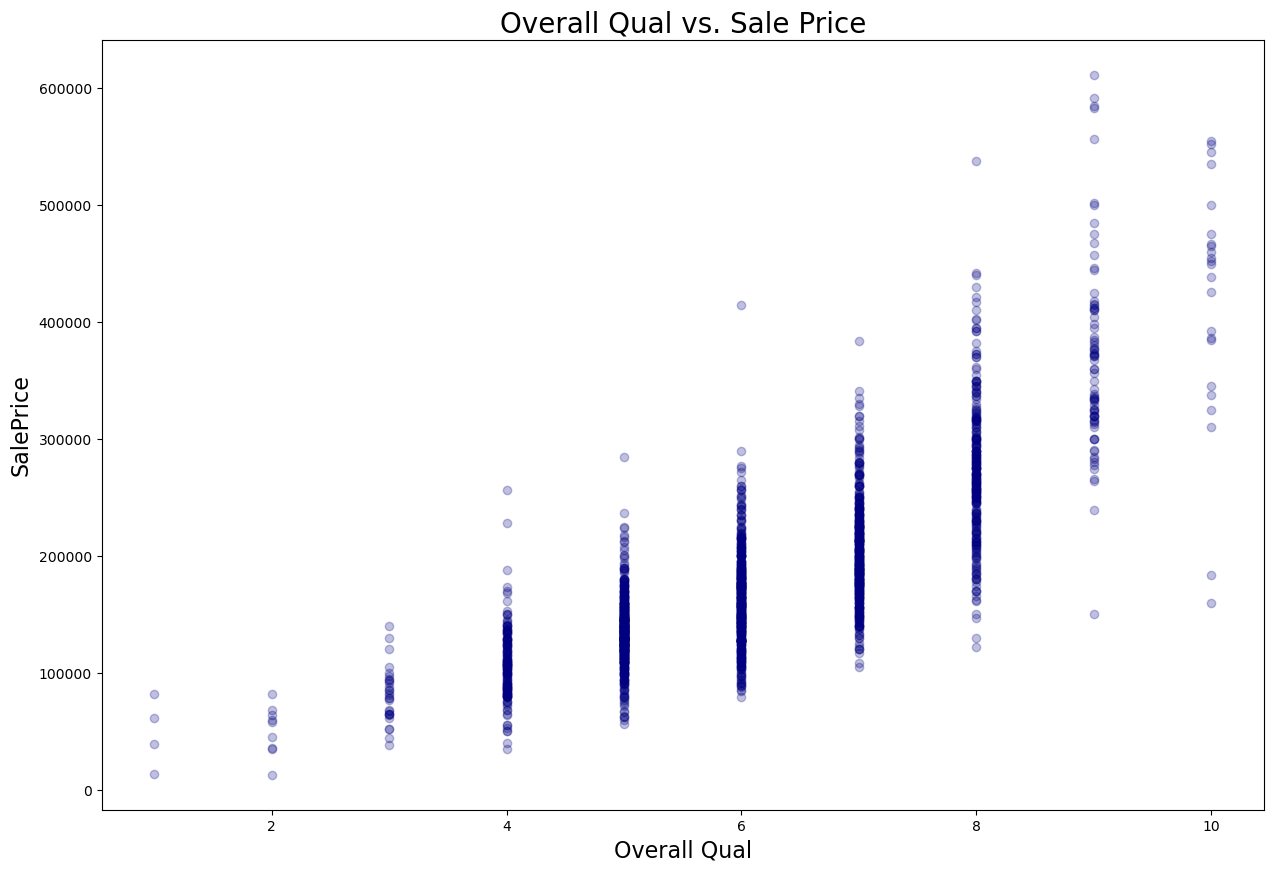

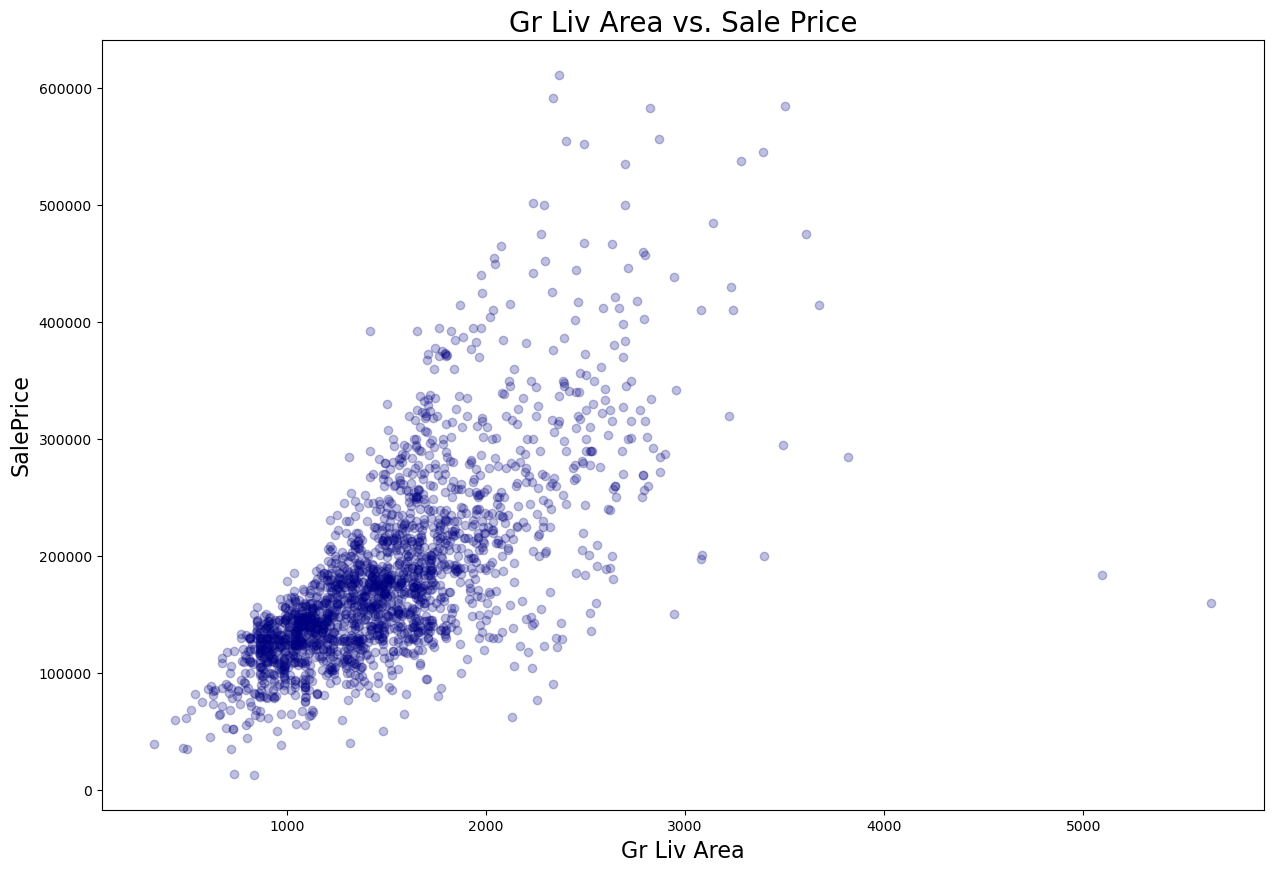

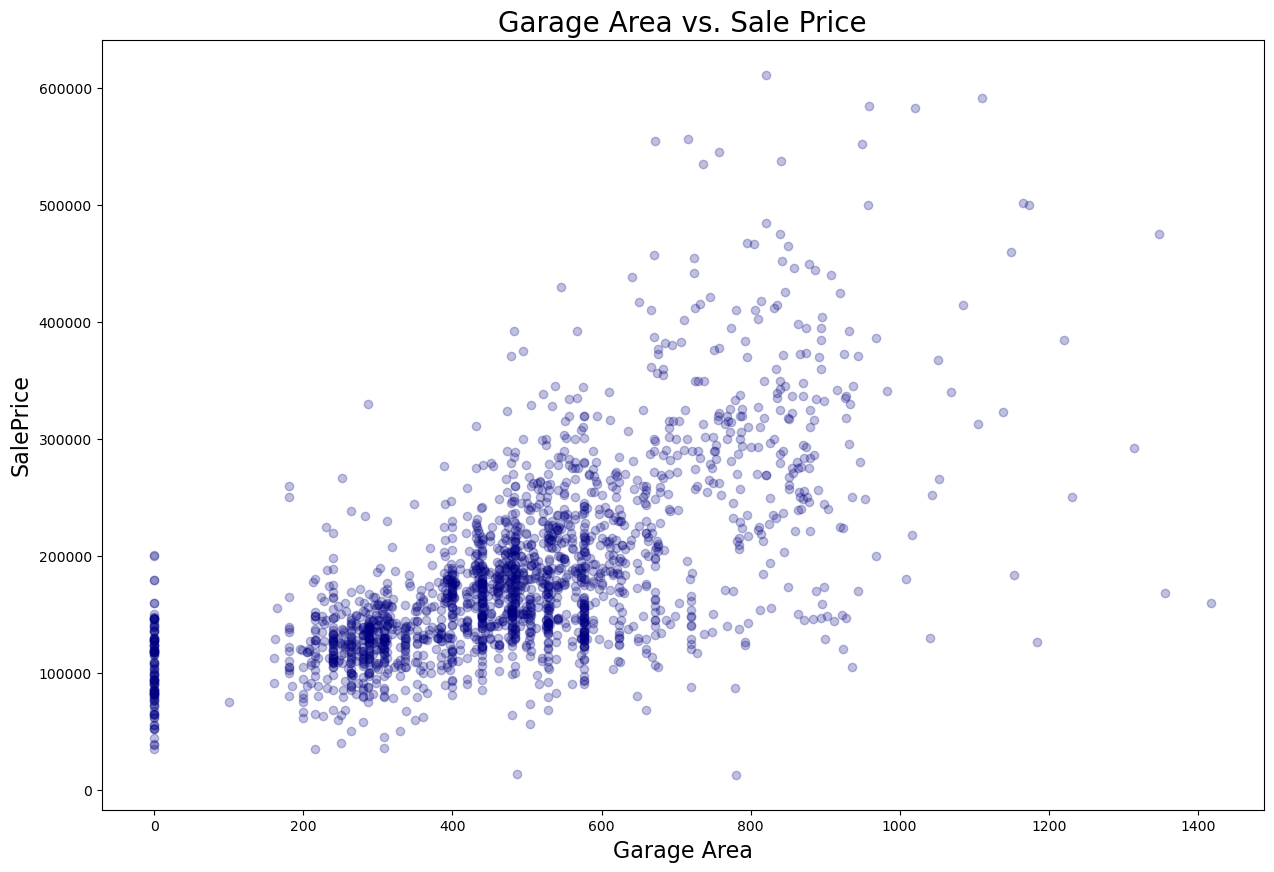

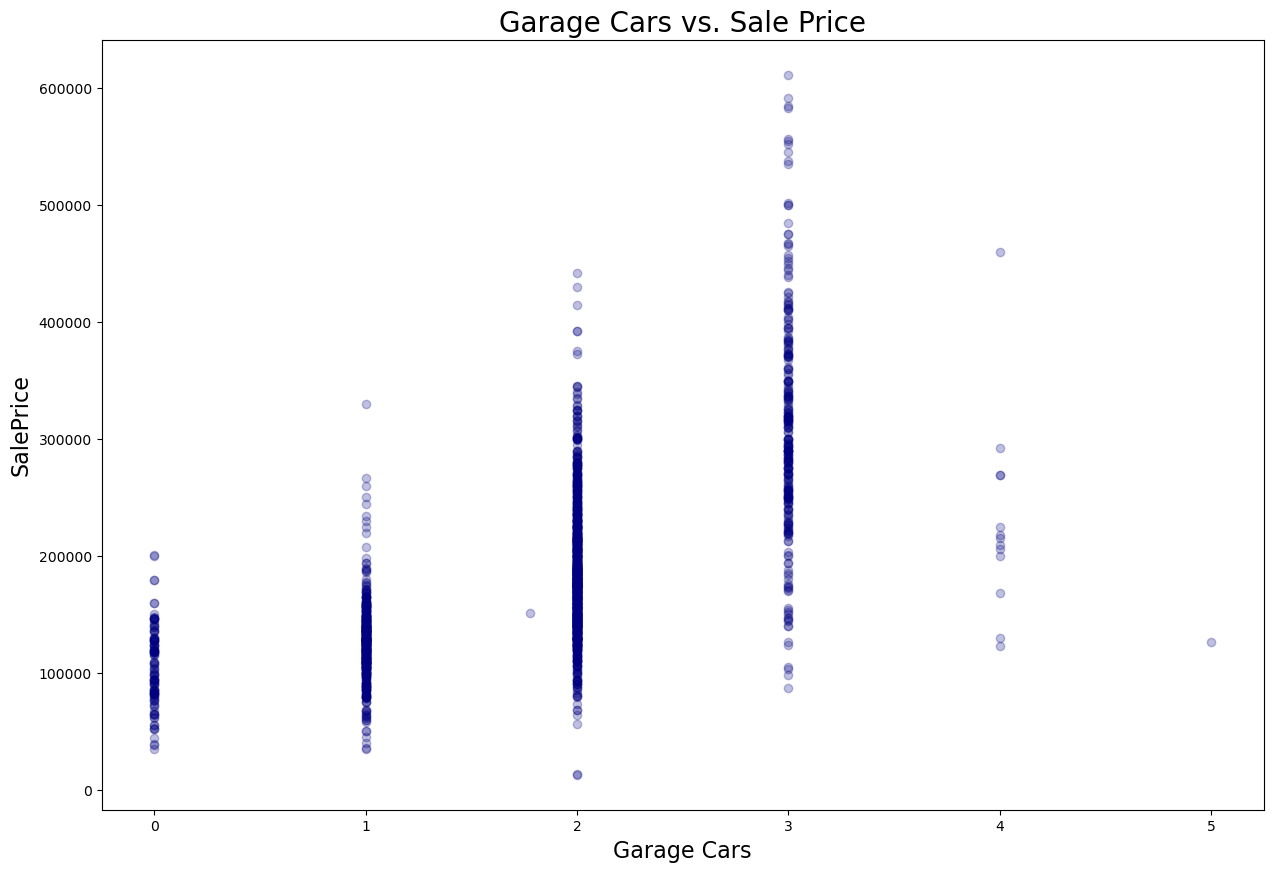

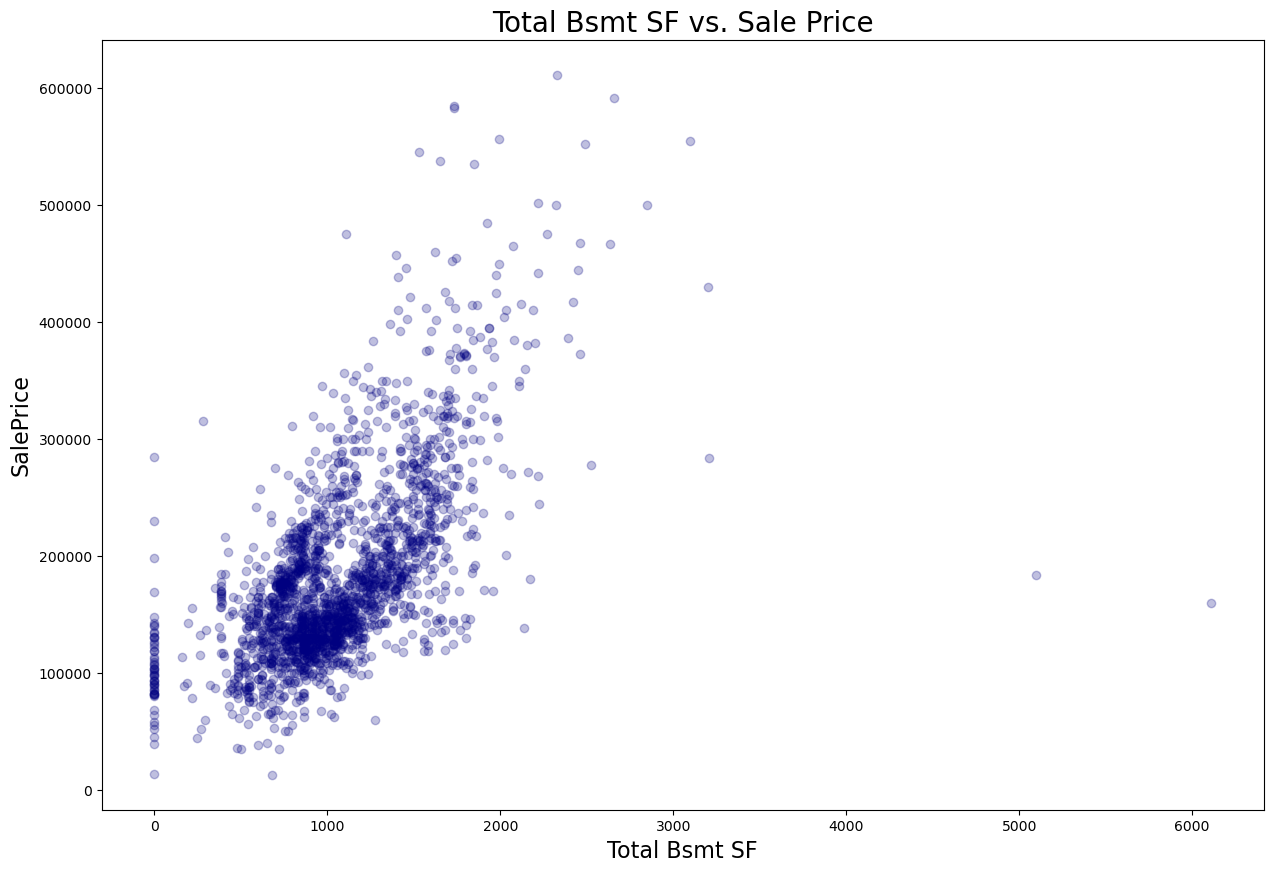

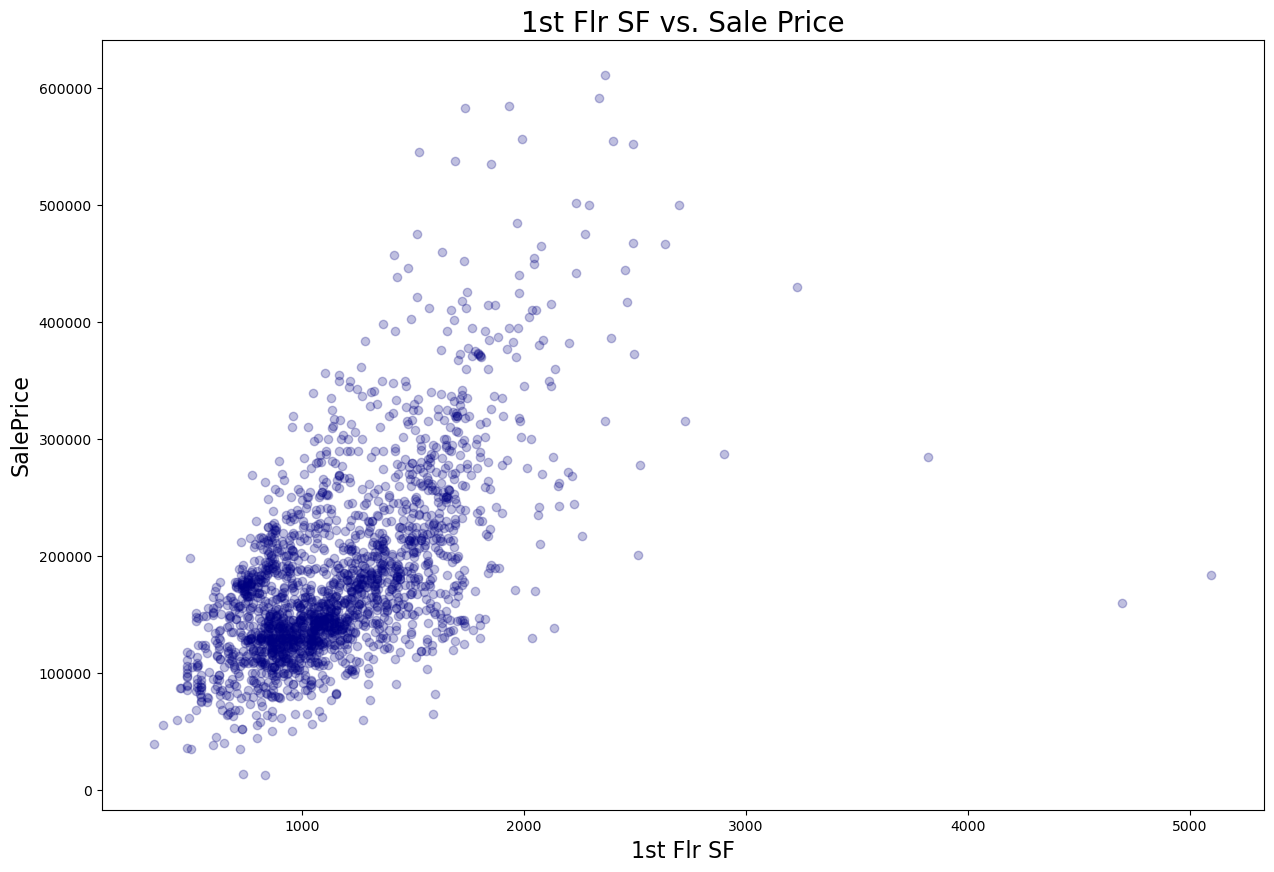

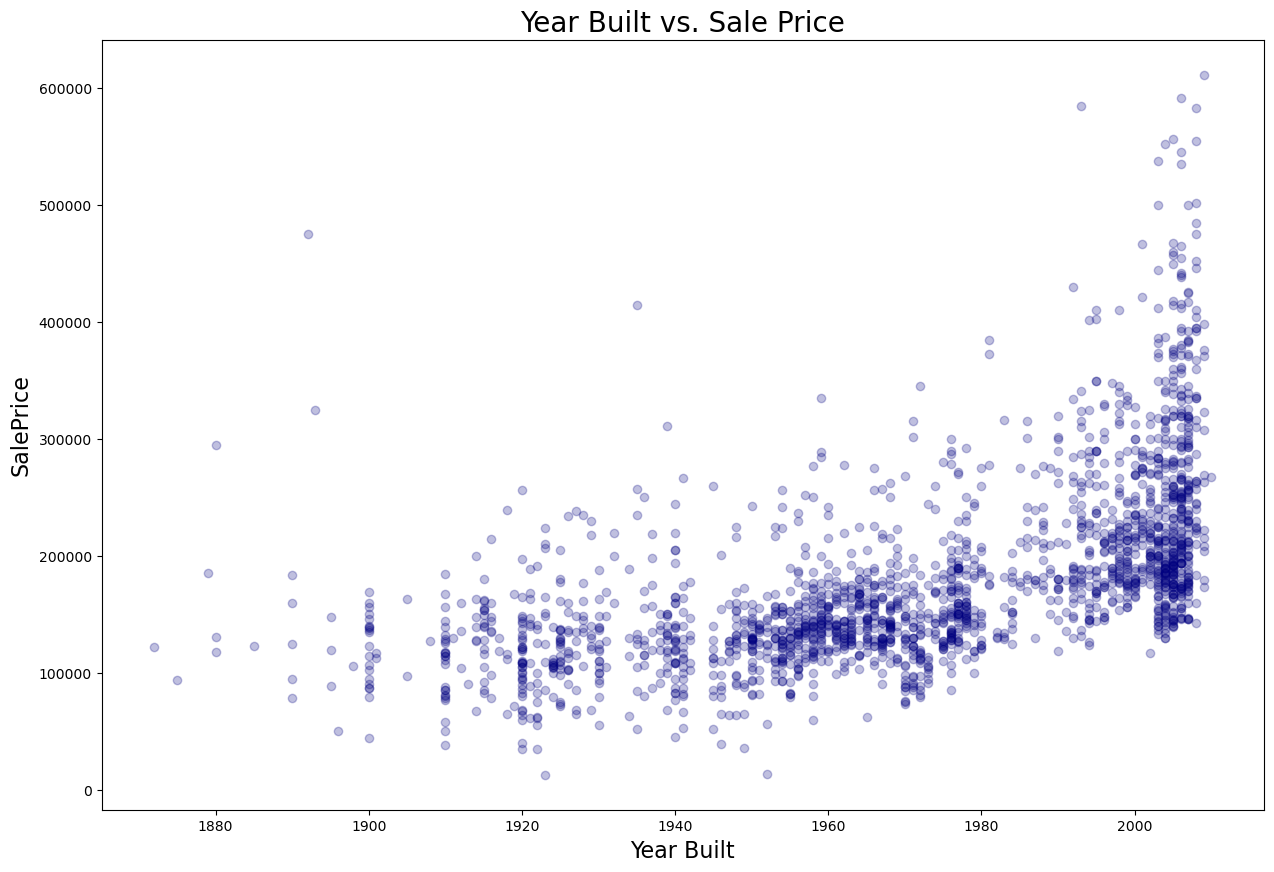

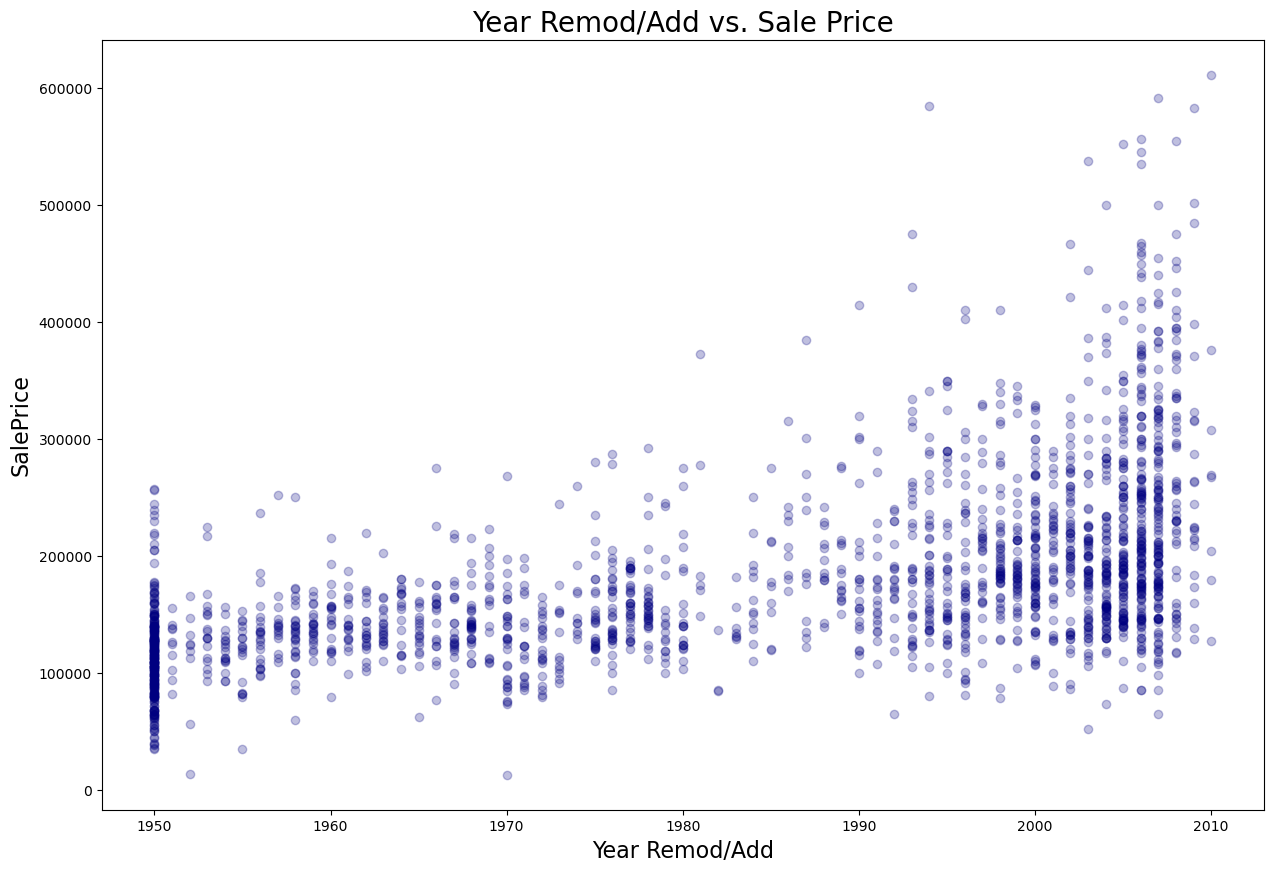

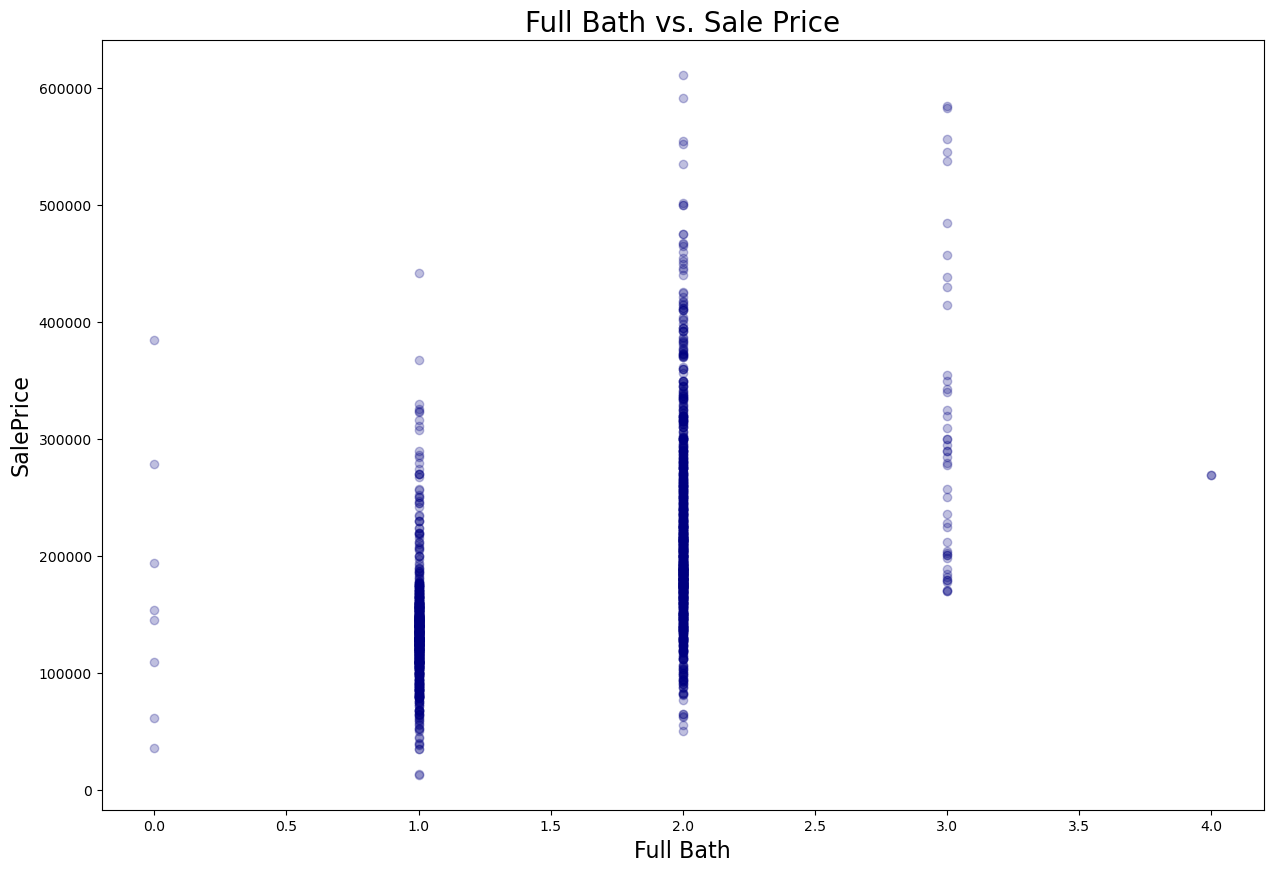

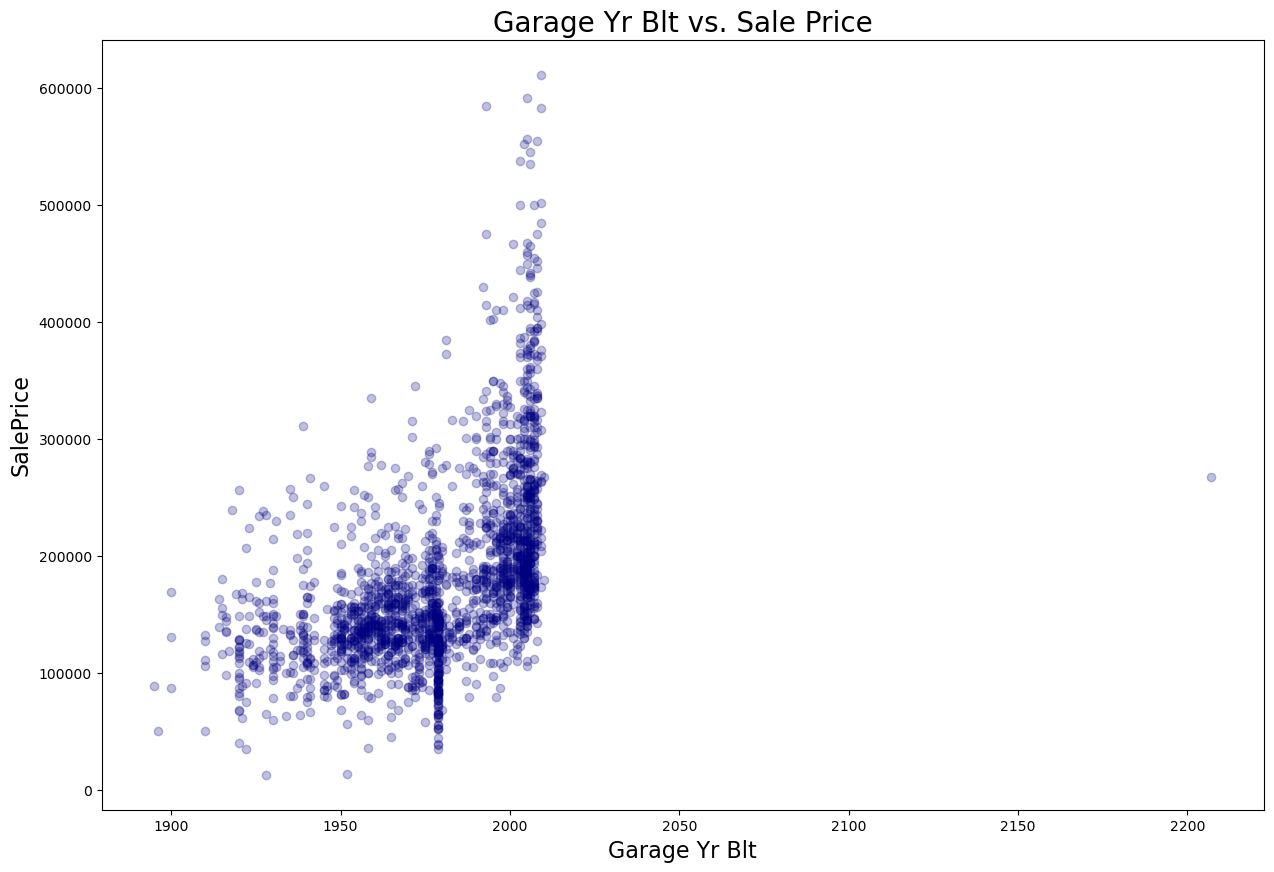

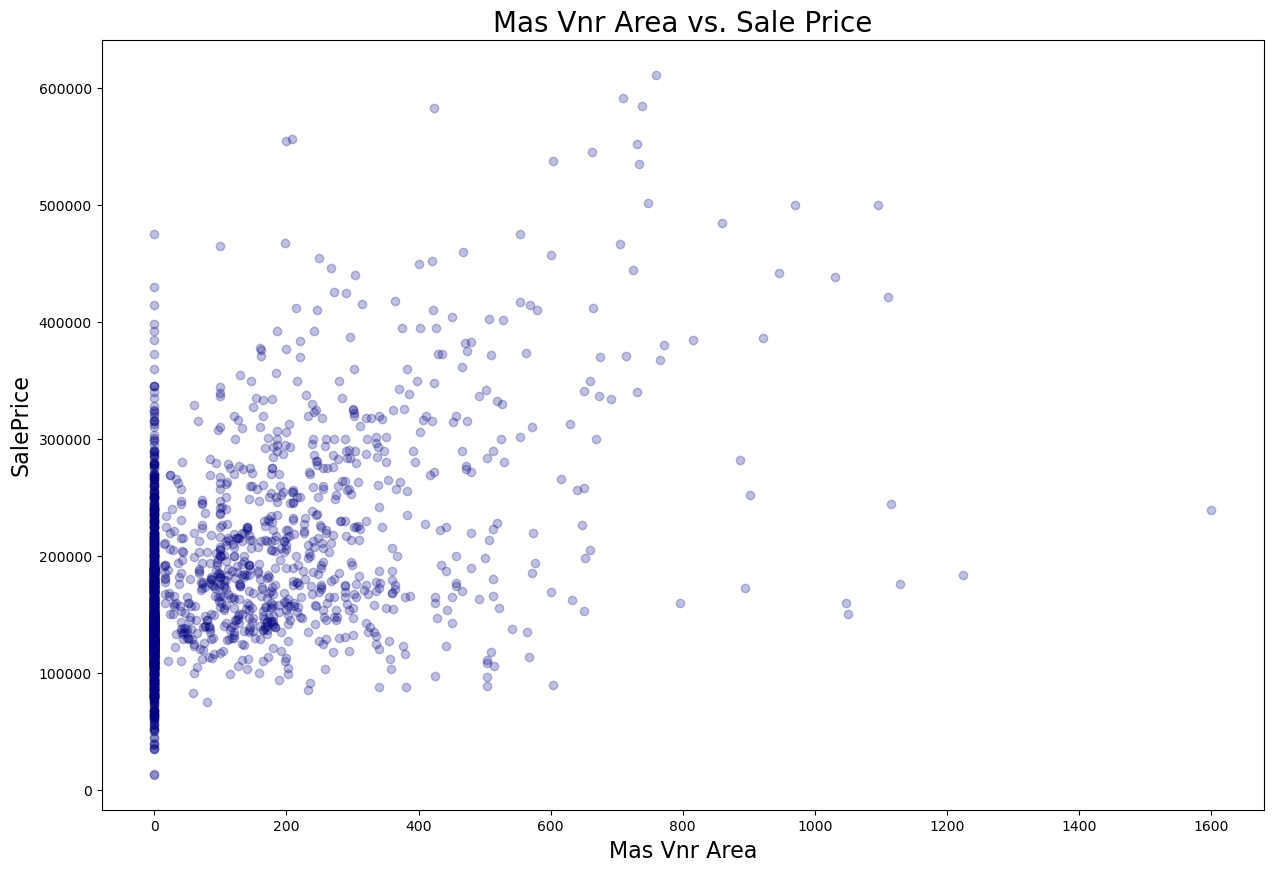

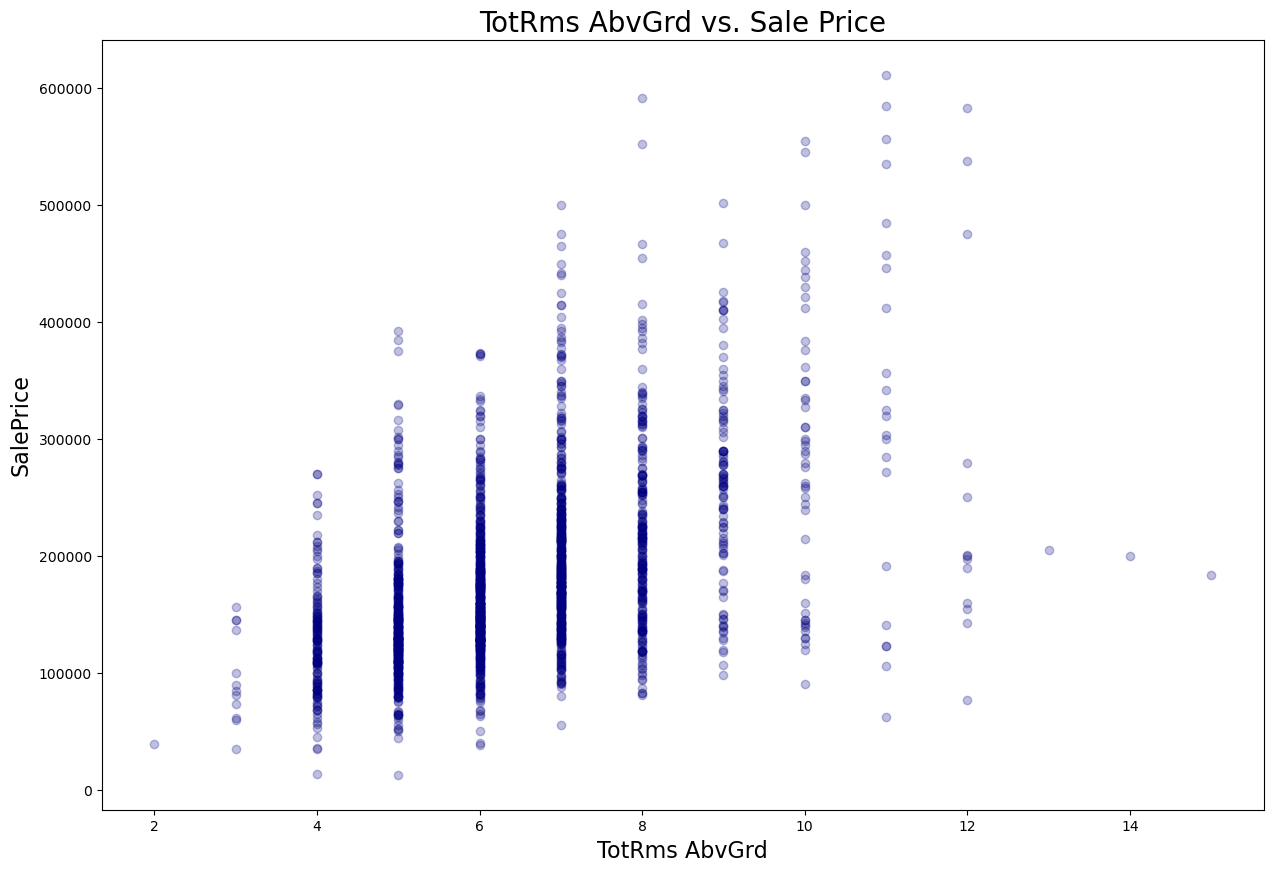

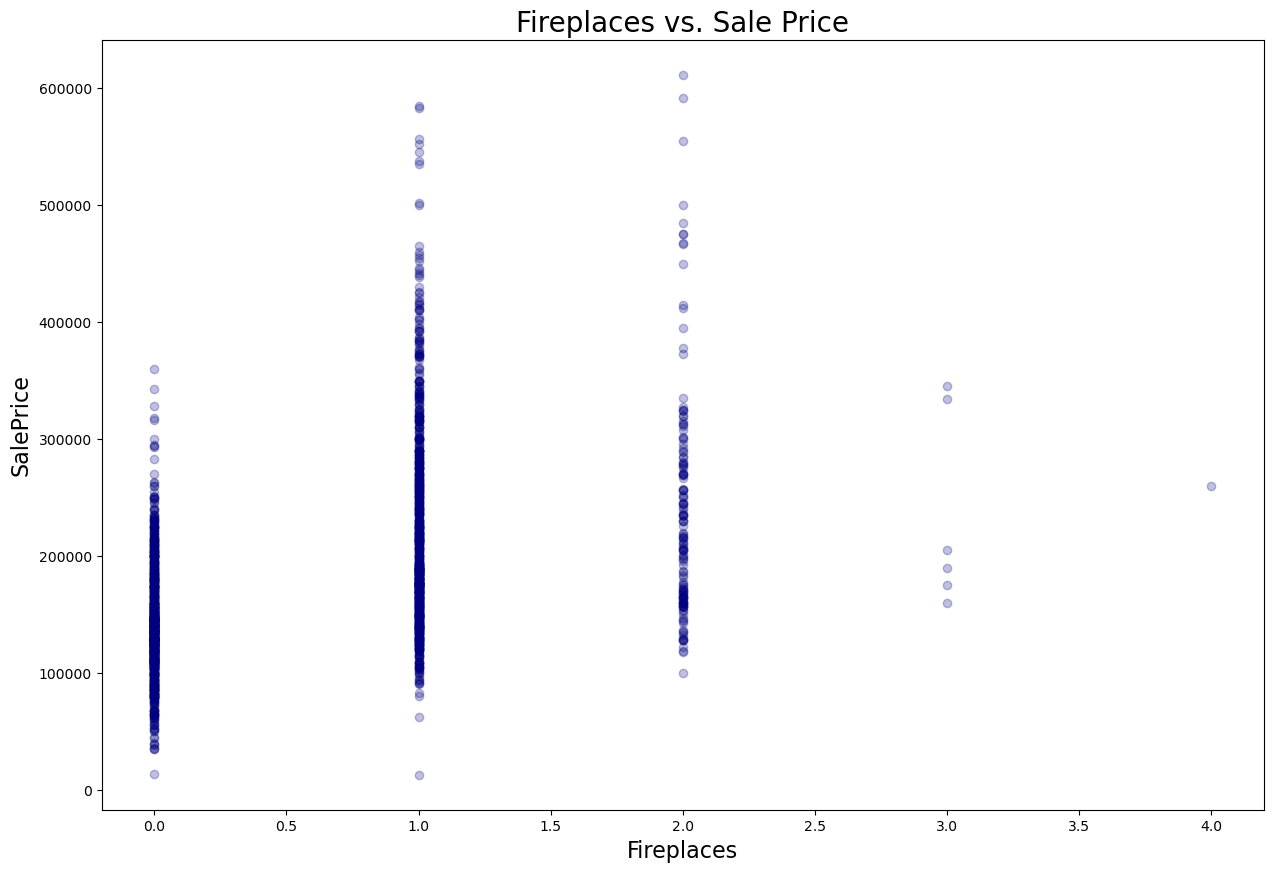

In [42]:
for column in list(corr_data_df.index.values)[:14]:
    if column != 'SalePrice':
        plt.figure(figsize=(15,10))
        plt.title(f"{column} vs. Sale Price", fontsize=20)
        plt.ylabel('SalePrice', fontsize=16)
        plt.xlabel(column, fontsize=16)
        plt.scatter(train_num_features[column], train_num_features['SalePrice'], alpha=0.25, c='navy')
    else:
        pass

Tenth plot for 'Garage Yr Blt' has one glaring outlier. Somehow built the garage around 2200 AD.
> - Fix by removing 200 years from the value stored. 
> - Assumption - Garage was most likely built in the 2000's.

In [44]:
train_df[train_df['Garage Yr Blt'] > 2200]['Garage Yr Blt']

1699    2207.0
Name: Garage Yr Blt, dtype: float64

In [45]:
# check what year built is like for index 1699
train_df['Year Built'][1699]

2006

In [46]:
# we can assume the year for garage was entered incorrectly. 
# more likely it was built in 2007, a year after the house was built. renovation?
# set value to 2207 - 200 = 2007

train_df['Garage Yr Blt'][1699] = 2007
train_df['Garage Yr Blt'][1699]

C:\Users\mrsha\AppData\Local\Temp\ipykernel_15224\2357598712.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Garage Yr Blt'][1699] = 2007


2007.0

Print out and compare scatter plots for 'Garage Yr Blt' and 'Year Built'!

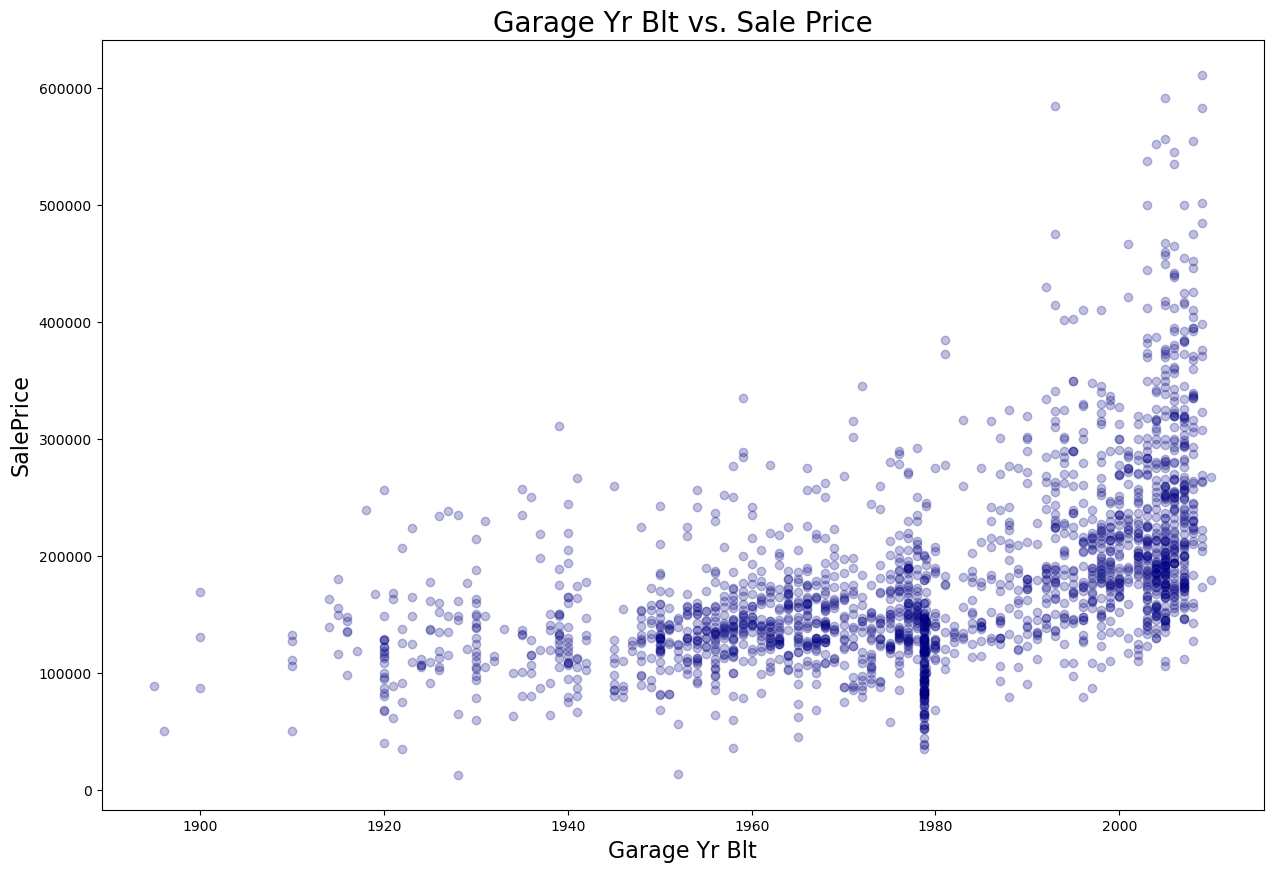

In [48]:
column = 'Garage Yr Blt'
plt.figure(figsize=(15,10))
plt.title(f"{column} vs. Sale Price", fontsize=20)
plt.ylabel('SalePrice', fontsize=16)
plt.xlabel(column,fontsize=16)
plt.scatter(train_num_features[column], train_num_features['SalePrice'], alpha=0.25, c='navy')

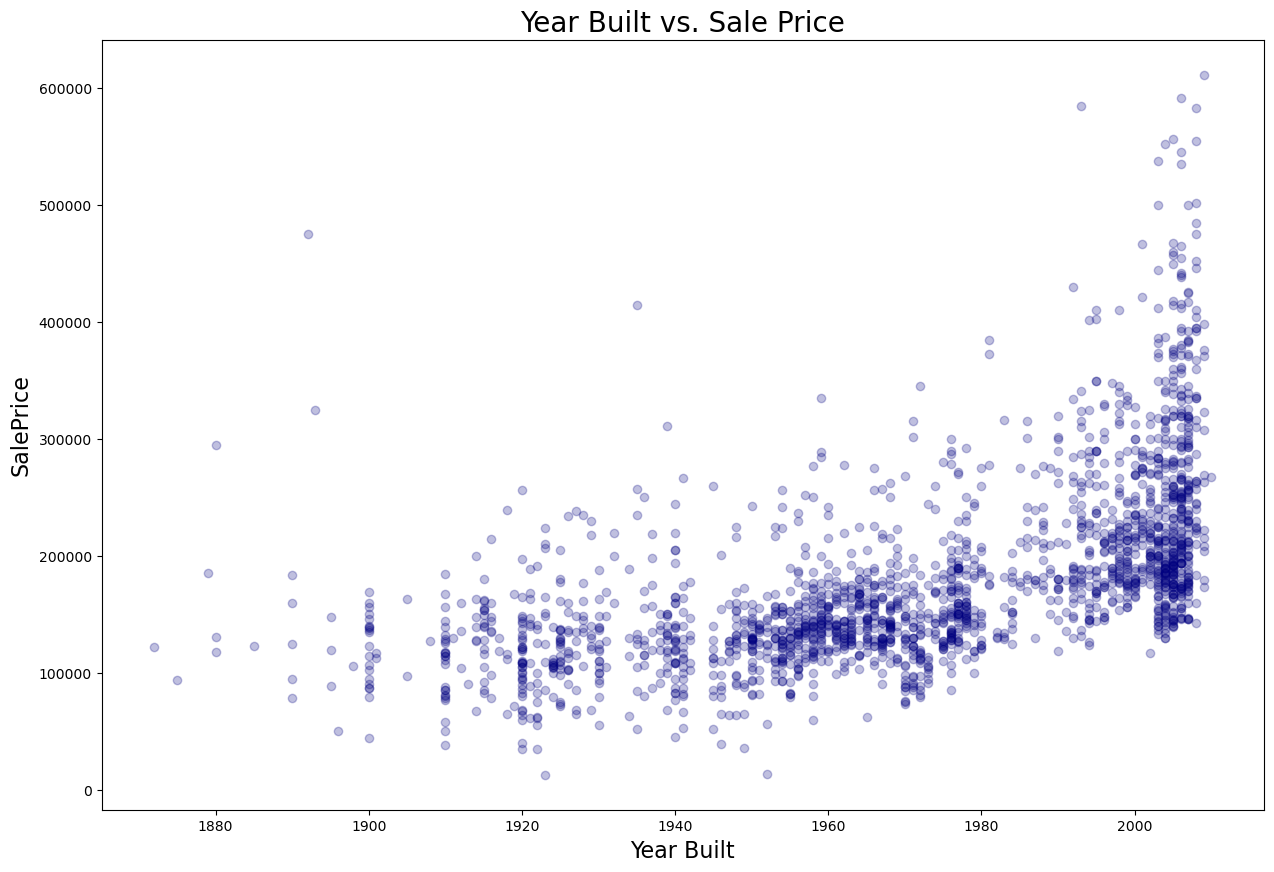

In [49]:
column = 'Year Built'
plt.figure(figsize=(15,10))
plt.title(f"{column} vs. Sale Price", fontsize=20)
plt.ylabel('SalePrice', fontsize=16)
plt.xlabel(column, fontsize=16)
plt.scatter(train_num_features[column], train_num_features['SalePrice'], alpha=0.25, c='navy')

Wow! Nearly identical! Looking good!

### Box plot distribution of Sales Prices

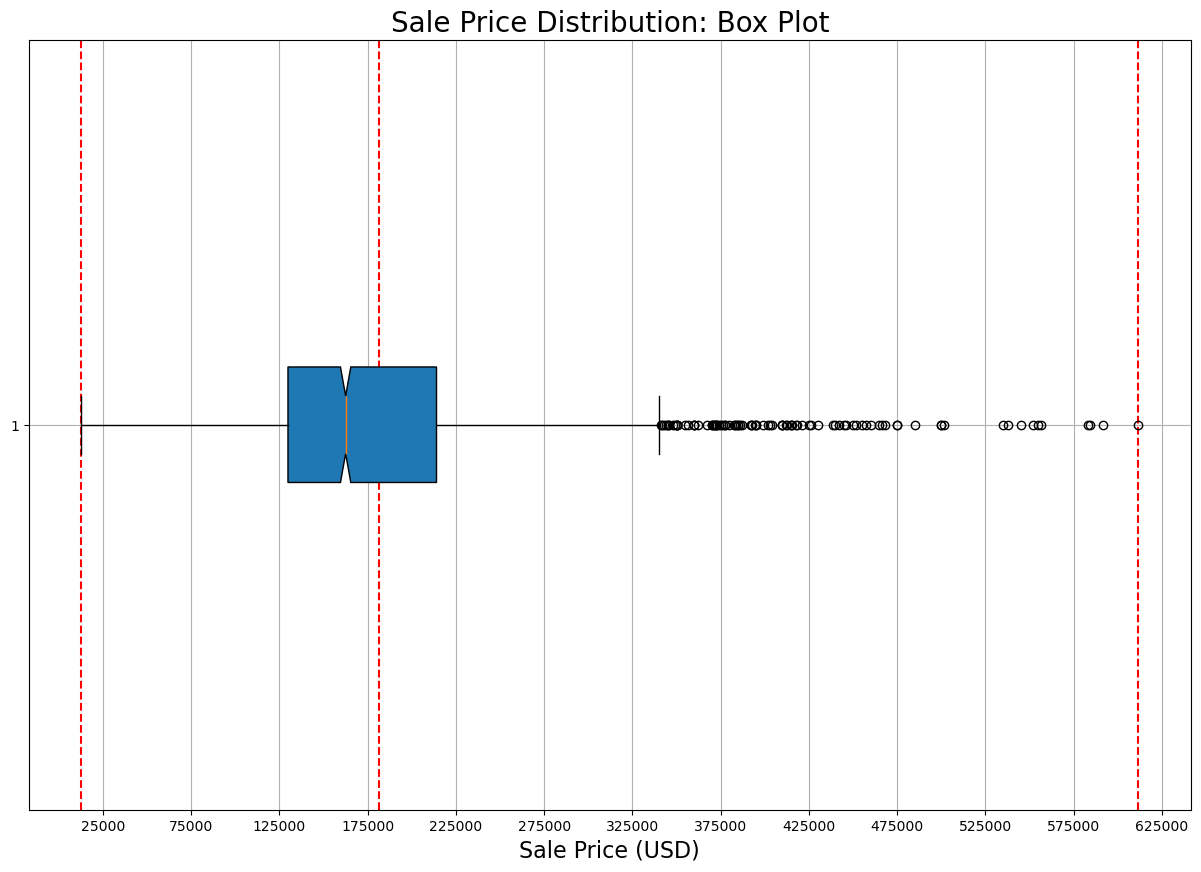

In [52]:
plt.figure(figsize=(15, 10))
plt.grid()

plt.title("Sale Price Distribution: Box Plot", fontsize=20)

plt.xlabel("Sale Price (USD)", fontsize=16)

plt.axvline(np.mean(train_df['SalePrice']), color='r', linestyle='dashed')
plt.axvline(np.max(train_df['SalePrice']), color='r', linestyle='dashed')
plt.axvline(np.min(train_df['SalePrice']), color='r', linestyle='dashed')

plt.xticks(range(25000, 625001, 50000))

plt.boxplot(train_df['SalePrice'], vert=False, patch_artist=True, notch=True);

### Histogram distribution

#### Sale Price Distribution

C:\Users\mrsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


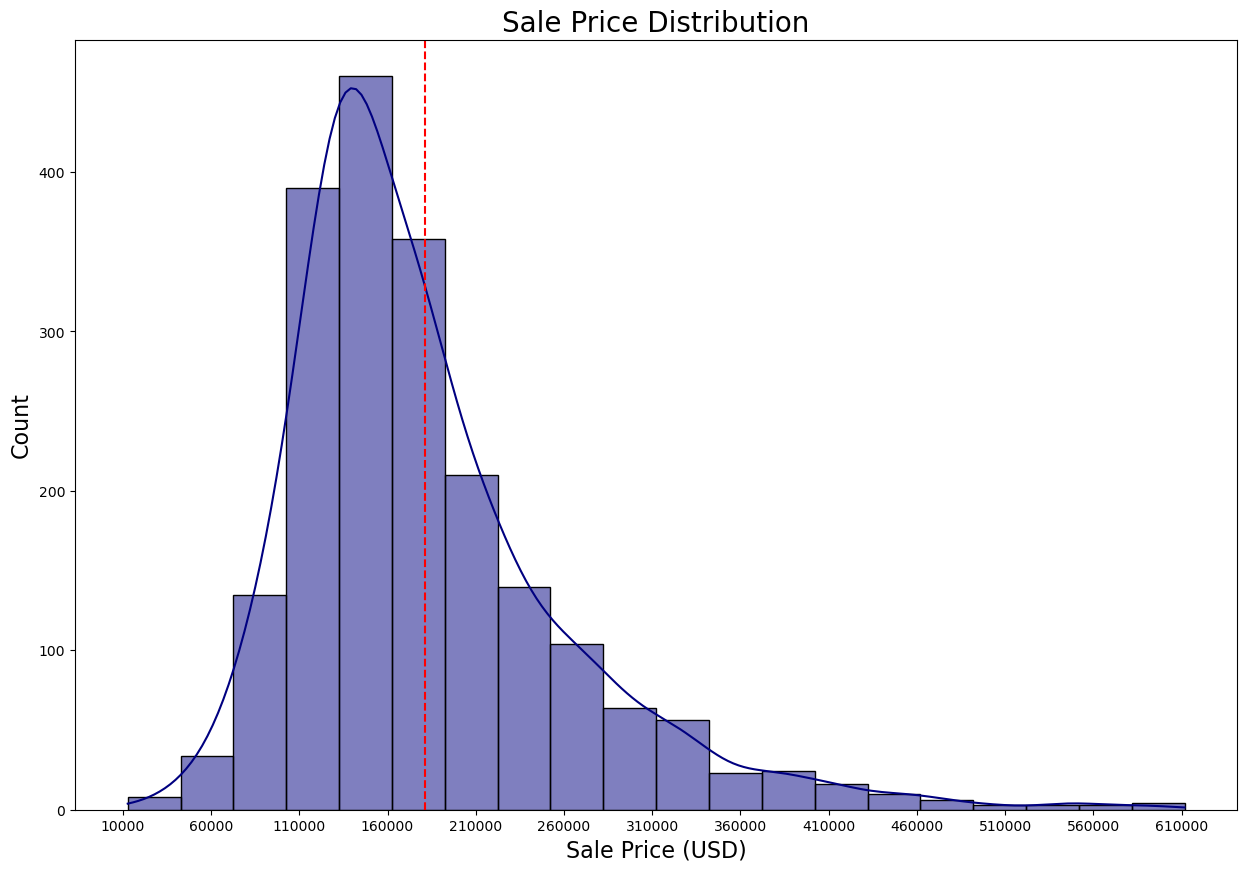

In [55]:
plt.figure(figsize=(15,10))

plt.title("Sale Price Distribution", fontsize=20)

plt.xlabel("Sale Price (USD)", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.xticks(range(10000, 620000, 50000))

sns.histplot(train_df['SalePrice'], bins=20, kde=True, color='navy')
plt.axvline(np.mean(train_df['SalePrice']), color='r', linestyle='dashed')

#### Overall Quality Distribution

C:\Users\mrsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


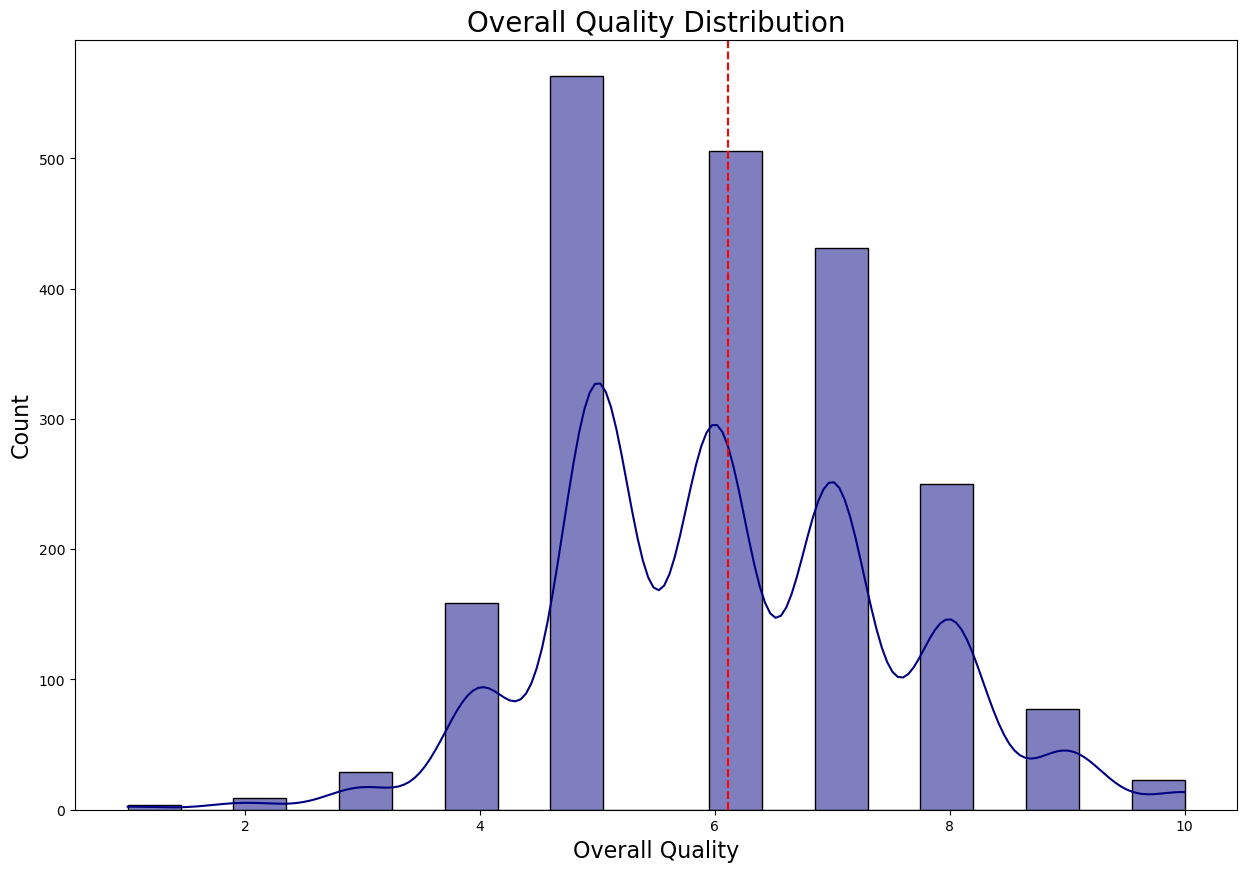

In [57]:
plt.figure(figsize=(15,10))

plt.title("Overall Quality Distribution", fontsize=20)

plt.xlabel("Overall Quality", fontsize=16)
plt.ylabel("Count", fontsize=16)

sns.histplot(train_df['Overall Qual'], bins=20, kde=True, color='navy')
plt.axvline(np.mean(train_df['Overall Qual']), color='r', linestyle='dashed')

#### Living Area Distribution

C:\Users\mrsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


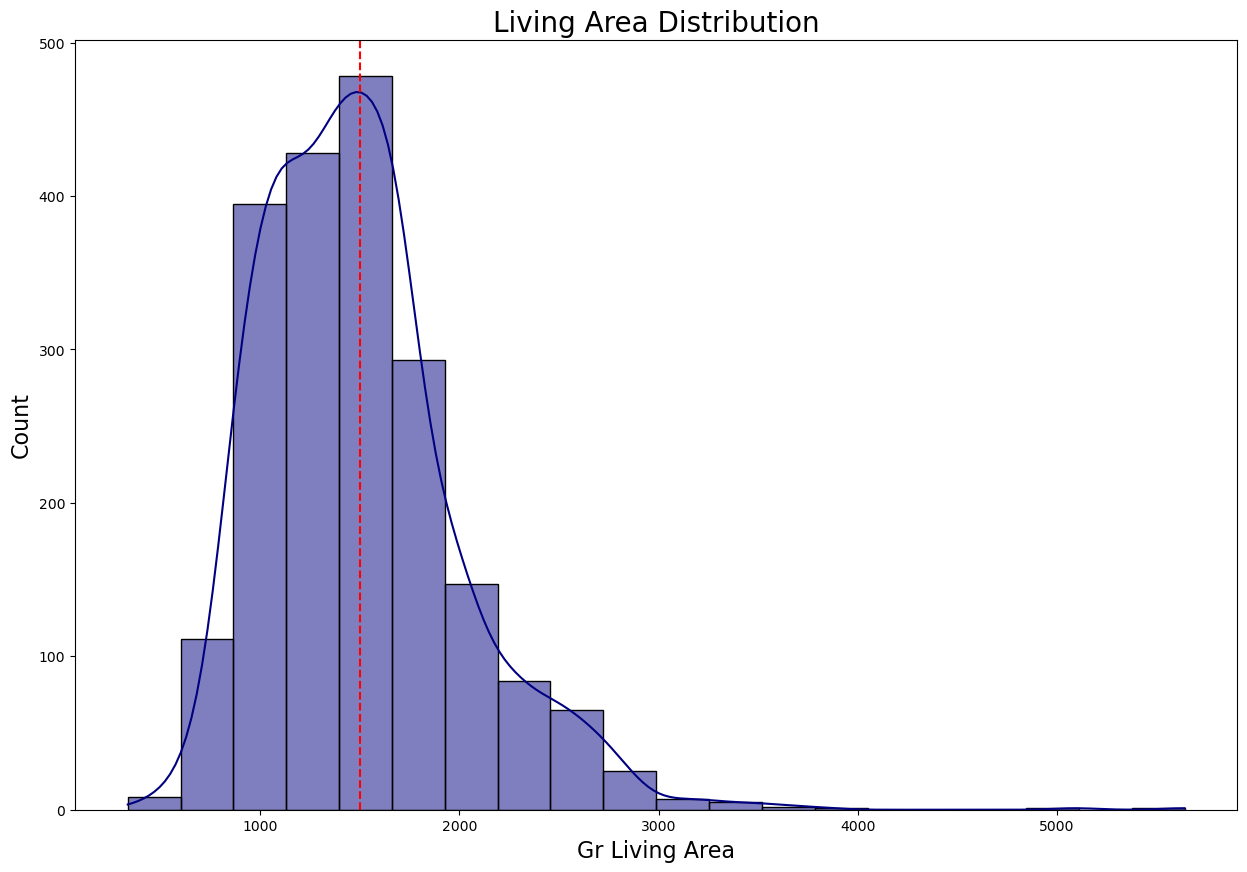

In [59]:
plt.figure(figsize=(15,10))

plt.title("Living Area Distribution", fontsize=20)

plt.xlabel("Gr Living Area", fontsize=16)
plt.ylabel("Count", fontsize=16)

sns.histplot(train_df['Gr Liv Area'], bins=20, kde=True, color='navy')
plt.axvline(np.mean(train_df['Gr Liv Area']), color='r', linestyle='dashed')

#### Garage Area Distribution

C:\Users\mrsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


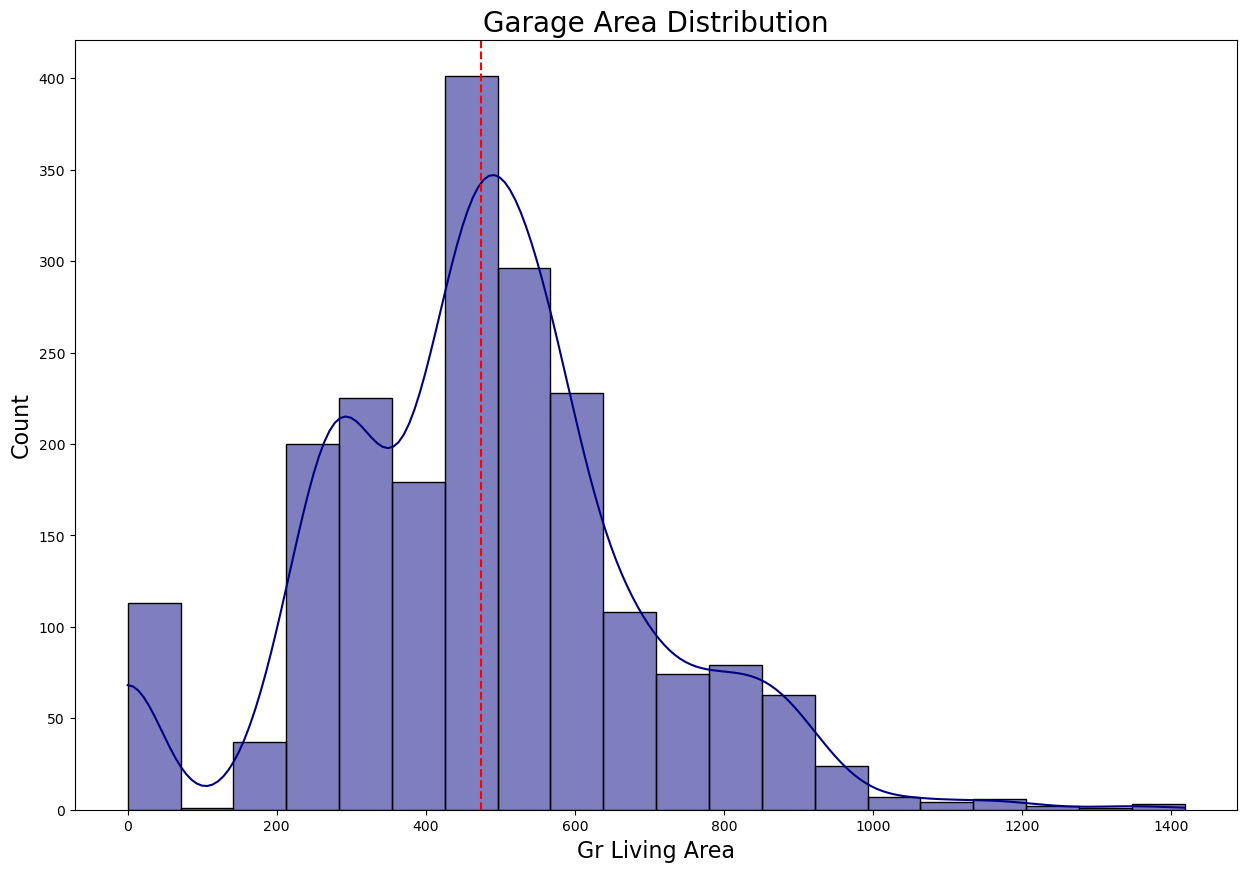

In [61]:
plt.figure(figsize=(15,10))

plt.title("Garage Area Distribution", fontsize=20)

plt.xlabel("Gr Living Area", fontsize=16)
plt.ylabel("Count", fontsize=16)

sns.histplot(train_df['Garage Area'], bins=20, kde=True, color='navy')
plt.axvline(np.mean(train_df['Garage Area']), color='r', linestyle='dashed')

#### Garage Cars Distribution

C:\Users\mrsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


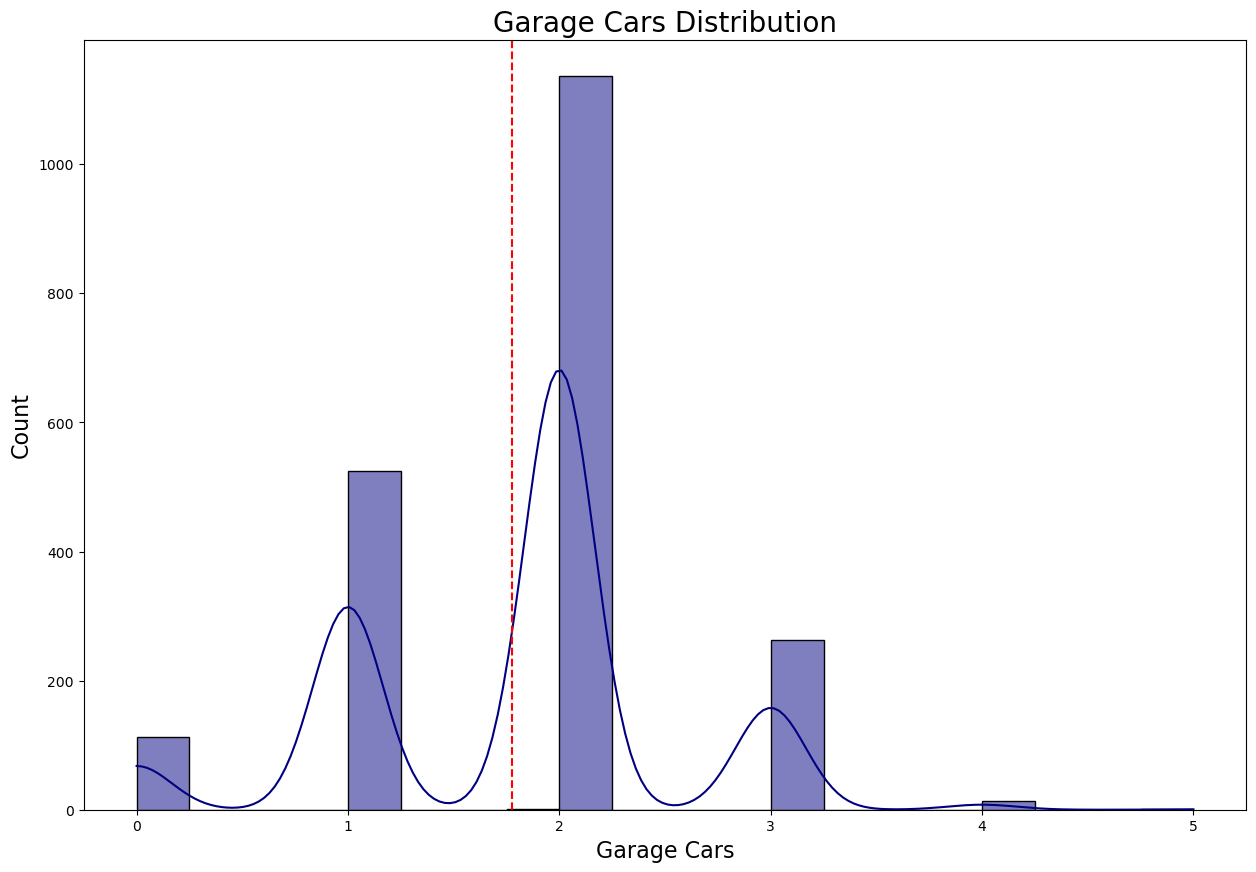

In [63]:
plt.figure(figsize=(15,10))

plt.title("Garage Cars Distribution", fontsize=20)

plt.xlabel("Garage Cars", fontsize=16)
plt.ylabel("Count", fontsize=16)

sns.histplot(train_df['Garage Cars'], bins=20, kde=True, color='navy')
plt.axvline(np.mean(train_df['Garage Cars']), color='r', linestyle='dashed')

In [64]:
# export cleaned train data
train_df.to_csv('../datasets/train_cleaned.csv', index=False)

In [65]:
# export cleaned test data
test_df.to_csv('../datasets/test_cleaned.csv', index=False)

# **Part 2** - Preprocessing and Feature Engineering

## Dummifying categorical features

In [68]:
# Loading the cleaned datasets
train_df = pd.read_csv('../datasets/train_cleaned.csv')
test_df = pd.read_csv('../datasets/test_cleaned.csv')

In [69]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0552,13517,Pave,Grvl,IR1,Lvl,...,0,0,Gd,MnPrv,Shed,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,Grvl,IR1,Lvl,...,0,0,Gd,MnPrv,Shed,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,Grvl,IR1,Lvl,...,0,0,Gd,MnPrv,Shed,0,3,2010,WD,138500


In [70]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,4,2006,WD
1,2718,905108090,90,RL,69.545961,9662,Pave,Grvl,IR1,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,Grvl,IR1,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,7,2007,WD
4,625,535105100,20,RL,69.545961,9500,Pave,Grvl,IR1,Lvl,...,0,185,0,Ex,MnPrv,Shed,0,7,2009,WD


In [71]:
train_df.shape

(2051, 81)

In [72]:
test_df.shape

(878, 80)

In [73]:
train_dummy_features = pd.get_dummies(train_df).astype(int)
test_dummy_features  = pd.get_dummies(test_df).astype(int)

In [74]:
train_dummy_features.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,69,13517,6,8,1976,2005,289,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43,11492,7,5,1996,1997,132,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68,7922,5,7,1953,2007,0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73,9802,5,5,2006,2007,0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82,14235,6,8,1900,1993,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
test_dummy_features.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69,9142,6,8,1910,1950,0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,69,9662,5,4,1977,1977,0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58,17104,7,5,2006,2006,0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60,8520,5,6,1923,2006,0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,69,9500,6,5,1963,1963,247,...,0,0,0,0,0,0,0,0,0,1


In [76]:
train_dummy_features.shape

(2051, 291)

In [77]:
test_dummy_features.shape

(878, 271)

> - Interesting we see a difference in number of features by 20 columns.
> - This is due to SalePrice being in train DF and not test DF

In [79]:
test_not_train = list(set(test_dummy_features.columns) - set(train_dummy_features.columns))

for column in test_not_train:
    train_dummy_features[column] = 0

In [80]:
train_dummy_features.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Sale Type_VWD,Exterior 2nd_PreCast,Roof Matl_Metal,Exterior 2nd_Other,Kitchen Qual_Po,Heating_Floor,Mas Vnr Type_CBlock,Exterior 1st_PreCast,Roof Matl_Roll
0,109,533352170,60,69,13517,6,8,1976,2005,289,...,1,0,0,0,0,0,0,0,0,0
1,544,531379050,60,43,11492,7,5,1996,1997,132,...,1,0,0,0,0,0,0,0,0,0
2,153,535304180,20,68,7922,5,7,1953,2007,0,...,1,0,0,0,0,0,0,0,0,0
3,318,916386060,60,73,9802,5,5,2006,2007,0,...,1,0,0,0,0,0,0,0,0,0
4,255,906425045,50,82,14235,6,8,1900,1993,0,...,1,0,0,0,0,0,0,0,0,0


In [81]:
train_dummy_features.shape

(2051, 300)

In [82]:
train_not_test = list(set(train_dummy_features.columns) - set(test_dummy_features.columns))

for column in train_not_test:
    test_dummy_features[column] = 0

In [83]:
test_dummy_features.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Condition 2_RRNn,Functional_Sal,Condition 2_PosN,Electrical_Mix,Condition 2_RRAe,MS Zoning_A (agr),Heating QC_Po,Functional_Sev,Heating_Wall,Roof Matl_Membran
0,2658,902301120,190,69,9142,6,8,1910,1950,0,...,0,0,0,0,0,0,0,0,0,0
1,2718,905108090,90,69,9662,5,4,1977,1977,0,...,0,0,0,0,0,0,0,0,0,0
2,2414,528218130,60,58,17104,7,5,2006,2006,0,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,60,8520,5,6,1923,2006,0,...,0,0,0,0,0,0,0,0,0,0
4,625,535105100,20,69,9500,6,5,1963,1963,247,...,0,0,0,0,0,0,0,0,0,0


In [84]:
test_dummy_features.shape

(878, 300)

### Merge dummified features with train_df and test_df 

In [86]:
# Concatenate the DataFrames along the columns axis
combined_train_df = pd.concat([train_df, train_dummy_features], axis=1)
combined_train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Sale Type_WD,Sale Type_VWD,Exterior 2nd_PreCast,Roof Matl_Metal,Exterior 2nd_Other,Kitchen Qual_Po,Heating_Floor,Mas Vnr Type_CBlock,Exterior 1st_PreCast,Roof Matl_Roll
0,109,533352170,60,RL,69.0552,13517,Pave,Grvl,IR1,Lvl,...,1,0,0,0,0,0,0,0,0,0
1,544,531379050,60,RL,43.0000,11492,Pave,Grvl,IR1,Lvl,...,1,0,0,0,0,0,0,0,0,0
2,153,535304180,20,RL,68.0000,7922,Pave,Grvl,Reg,Lvl,...,1,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0000,9802,Pave,Grvl,Reg,Lvl,...,1,0,0,0,0,0,0,0,0,0
4,255,906425045,50,RL,82.0000,14235,Pave,Grvl,IR1,Lvl,...,1,0,0,0,0,0,0,0,0,0


In [87]:
combined_train_df.shape

(2051, 381)

In [88]:
# Concatenate the DataFrames along the columns axis
combined_test_df = pd.concat([test_df, test_dummy_features], axis=1)
combined_test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Condition 2_RRNn,Functional_Sal,Condition 2_PosN,Electrical_Mix,Condition 2_RRAe,MS Zoning_A (agr),Heating QC_Po,Functional_Sev,Heating_Wall,Roof Matl_Membran
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,0
1,2718,905108090,90,RL,69.545961,9662,Pave,Grvl,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0
2,2414,528218130,60,RL,58.000000,17104,Pave,Grvl,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.000000,8520,Pave,Grvl,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,0
4,625,535105100,20,RL,69.545961,9500,Pave,Grvl,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0


In [89]:
combined_test_df.shape

(878, 380)

### Drop Categorical Columns

In [91]:
train_features_list = list(combined_train_df.columns)
train_num_features = combined_train_df._get_numeric_data()
train_num_features_list = list(train_num_features.columns)

train_category_features_list  = list(set(train_features_list) - set(train_num_features_list))
train_df_no_category_features = combined_train_df.drop(train_category_features_list, axis=1)
train_df_no_category_features.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Sale Type_VWD,Exterior 2nd_PreCast,Roof Matl_Metal,Exterior 2nd_Other,Kitchen Qual_Po,Heating_Floor,Mas Vnr Type_CBlock,Exterior 1st_PreCast,Roof Matl_Roll
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,1,0,0,0,0,0,0,0,0,0
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,1,0,0,0,0,0,0,0,0,0
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,1,0,0,0,0,0,0,0,0,0


In [92]:
train_df_no_category_features.shape

(2051, 339)

In [93]:
test_features_list = list(combined_test_df.columns)
test_num_features = combined_test_df._get_numeric_data()
test_num_features_list = list(test_num_features.columns)

test_category_features_list  = list(set(test_features_list) - set(test_num_features_list))
test_df_no_category_features = combined_test_df.drop(test_category_features_list, axis=1)
test_df_no_category_features.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Condition 2_RRNn,Functional_Sal,Condition 2_PosN,Electrical_Mix,Condition 2_RRAe,MS Zoning_A (agr),Heating QC_Po,Functional_Sev,Heating_Wall,Roof Matl_Membran
0,2658,902301120,190,69.000000,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2718,905108090,90,69.545961,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2414,528218130,60,58.000000,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,60.000000,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
4,625,535105100,20,69.545961,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
test_df_no_category_features.shape

(878, 338)

### Summary Statistics

In [96]:
train_df_no_category_features.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Sale Type_VWD,Exterior 2nd_PreCast,Roof Matl_Metal,Exterior 2nd_Other,Kitchen Qual_Po,Heating_Floor,Mas Vnr Type_CBlock,Exterior 1st_PreCast,Roof Matl_Roll
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.0,2051.0,2051.0,2051.0,2051.0,2051.0,2051.0,2051.0,2051.0
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,0.868357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,843.980841,1.886918e+08,42.824223,21.306357,6742.488909,1.426271,1.104497,30.177889,21.036250,174.021770,...,0.338185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,753.500000,5.284581e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1486.000000,5.354532e+08,50.000000,69.055200,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
test_df_no_category_features.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Condition 2_RRNn,Functional_Sal,Condition 2_PosN,Electrical_Mix,Condition 2_RRAe,MS Zoning_A (agr),Heating QC_Po,Functional_Sev,Heating_Wall,Roof Matl_Membran
count,878.000000,8.780000e+02,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,...,878.0,878.0,878.0,878.0,878.0,878.0,878.0,878.0,878.0,878.0
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,850.838263,1.889103e+08,42.235407,21.279162,10002.674602,1.369065,1.128903,30.395895,20.450725,187.052173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,692.250000,5.284841e+08,20.000000,60.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1433.000000,5.354542e+08,50.000000,69.545961,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2197.500000,9.071904e+08,70.000000,78.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,171.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
train_df_no_category_features['SalePrice']

,SalePrice,SalePrice
0,130500,130500
1,220000,220000
2,109000,109000
3,174000,174000
4,138500,138500
...,...,...
2046,298751,298751
2047,82500,82500
2048,177000,177000
2049,144000,144000


In [99]:
train_df_no_category_features = train_df_no_category_features.loc[:,~train_df_no_category_features.columns.duplicated()]

In [100]:
train_df_no_category_features['SalePrice']

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

In [101]:
test_df_no_category_features['SalePrice']

0      0
1      0
2      0
3      0
4      0
      ..
873    0
874    0
875    0
876    0
877    0
Name: SalePrice, Length: 878, dtype: int64

> - This is not really interpretable. Let's look at isolating Sale Price and see its summary stats

In [103]:
sale_price_df = pd.DataFrame(train_df_no_category_features['SalePrice'].describe())
sale_price_df

,SalePrice
count,2051.000000
mean,181469.701609
std,79258.659352
min,12789.000000
25%,129825.000000
50%,162500.000000
75%,214000.000000
max,611657.000000


# **Part 3** - Model Fitting and Benchmark Metrics

In [105]:
# load data again
train_df = pd.read_csv('../datasets/train_cleaned.csv')
test_df = pd.read_csv('../datasets/test_cleaned.csv')

In [106]:
# define feature columns and target column
features = ['Overall Qual', 
            'Gr Liv Area', 
            'Garage Area', 
            'Garage Cars', 
            'Total Bsmt SF', 
            'Year Built',
            'Year Remod/Add', 
            'Full Bath', 
            'Half Bath',
            'Garage Yr Blt', 
            'Mas Vnr Area', 
            'Bedroom AbvGr',
            'TotRms AbvGrd']
target = 'SalePrice'

X = train_df[features]
y = train_df[target]

In [107]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# standardize features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [109]:
# instantiate PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# transform features to PolynomialFeatures
X_train_poly = poly.fit_transform(X_train_sc)
X_test_poly = poly.transform(X_test_sc)

In [110]:
# instantiate linear regression model
linreg = LinearRegression()

# train model
linreg.fit(X_train_poly, y_train)

LinearRegression()

In [111]:
# test data predictions
y_pred = linreg.predict(X_test_poly)

In [112]:
# evaluate model metrics
r2   = r2_score(y_test, y_pred)

mae_mean   = mean_absolute_error(y_test, y_pred)
mae_median = median_absolute_error(y_test, y_pred)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f'R Squared: {r2}')
print(f'Mean Absolute Error: {mae_mean}')
print(f'Median Absolute Error: {mae_median}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

R Squared: 0.8871324703612562
Mean Absolute Error: 19059.089077633616
Median Absolute Error: 14680.672247606039
Mean Squared Error: 670604176.1029077
Root Mean Squared Error: 25896.026260855306


In [113]:
# display coefficients in DataFrame
coefficients = pd.DataFrame(linreg.coef_, poly.get_feature_names_out(features), columns=['Coefficient'])
coefficients[:13]

,Coefficient
Overall Qual,19584.643368
Gr Liv Area,30567.806556
Garage Area,3632.171877
Garage Cars,3752.703201
Total Bsmt SF,17590.308753
Year Built,3826.982390
Year Remod/Add,13831.683719
Full Bath,-1391.598275
Half Bath,5545.739733
Garage Yr Blt,-854.198309


# **Part 4** - Model Tuning for Competition

### Ridge Regression

In [116]:
# ridge regression for regularization
ridge = Ridge(alpha=8)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)

In [117]:
# evaluate model metrics
r2   = r2_score(y_test, y_pred_ridge)

mae_mean   = mean_absolute_error(y_test, y_pred_ridge)
mae_median = median_absolute_error(y_test, y_pred_ridge)

mse  = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)


print(f'R Squared: {r2}')
print(f'Mean Absolute Error: {mae_mean}')
print(f'Median Absolute Error: {mae_median}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

R Squared: 0.8872678653805913
Mean Absolute Error: 19033.69638362567
Median Absolute Error: 14572.504790880485
Mean Squared Error: 669799724.4977359
Root Mean Squared Error: 25880.489263105825


### Lasso Regression

In [119]:
# lasso regression for regularization
lasso = Lasso(alpha=8, max_iter=10000)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)

In [120]:
# evaluate model metric
r2   = r2_score(y_test, y_pred_lasso)

mae_mean   = mean_absolute_error(y_test, y_pred_lasso)
mae_median = median_absolute_error(y_test, y_pred_lasso)

mse  = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)


print(f'R Squared: {r2}')
print(f'Mean Absolute Error: {mae_mean}')
print(f'Median Absolute Error: {mae_median}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

R Squared: 0.8874283150793292
Mean Absolute Error: 19039.356262231824
Median Absolute Error: 14552.458647036576
Mean Squared Error: 668846410.1266992
Root Mean Squared Error: 25862.06507854118


### ElasticNet Regression

In [122]:
# lasso regression for regularization
elastic_net = ElasticNet()
elastic_net.fit(X_train_poly, y_train)
y_pred_elastic_net = elastic_net.predict(X_test_poly)

In [123]:
# evaluate model
r2   = r2_score(y_test, y_pred_elastic_net)

mae_mean   = mean_absolute_error(y_test, y_pred_elastic_net)
mae_median = median_absolute_error(y_test, y_pred_elastic_net)

mse  = mean_squared_error(y_test, y_pred_elastic_net)
rmse = np.sqrt(mse)

print(f'R Squared: {r2}')
print(f'Mean Absolute Error: {mae_mean}')
print(f'Median Absolute Error: {mae_median}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

R Squared: 0.8504101451655979
Mean Absolute Error: 20665.268367674693
Median Absolute Error: 13833.485296685321
Mean Squared Error: 888790440.2236749
Root Mean Squared Error: 29812.588619971848


**Conclusion**: **Lasso Regression Model** gives us the best shot at predicting SalePrice values.

In [125]:
# display lasso coefficients
coefficients = pd.DataFrame(lasso.coef_, poly.get_feature_names_out(features), columns=['Coefficient'])
coefficients[:13]

,Coefficient
Overall Qual,19592.179437
Gr Liv Area,30637.903451
Garage Area,3613.118291
Garage Cars,3737.037427
Total Bsmt SF,17592.113083
Year Built,3678.452932
Year Remod/Add,13744.473126
Full Bath,-1370.370783
Half Bath,5507.341258
Garage Yr Blt,-644.201221


# **Part 5** - Model Insights

Here are some interesting conclusions from the lasso coefficients listed in the DataFrame above:
> - holding all else constant, for every one car increase in Garage Cars, expect the Sale Price to increase by about $3,740.

> - holding all else constant, for every one year increase in Year Built, expect the Sale Price to increase by about $3,680.

> - holding all else constant, for every one value increase in Overall Qual, expect the Sale Price to increase by about $19,590.

Lasso Regression Model gives the lowest RMSE of 29812! Expect the Kaggle Score to be different on the leaderboards. But from the looks of it, this might one of the best models, ranking in possibly 4th or 5th place. Let's submit our model as a csv to Kaggle with just the 'Id' and 'SalePrice' columns.

My previous failed attempt to automate plotting, benchmark metrics and fitting candidate models ended up causing more headaches than actual predictions. This method created some form of data leakage where my train R2 score was nearly 1.0 and test R2 was above 1.0! Definitely overfit!

My failed automation method gave me the following RMSE scores on Kaggle: 
> - 14,375,669 
> - 136,997
> - 69,011
> - 68,922

In a panic, I tried to brute force a better result before the midnight deadline, but the scores were worse and didnt change. I assumed lack of features chosen might have had an impact:
> - 98, 285


# **Part 6** - Kaggle Submission (Late but Precise)

In [131]:
# select ridge as model for predictions on test_df 
best_model = lasso

# preprocess test data to match training data
X_test_final = test_df[features].copy()

# standardize test features
X_test_final_scaled = sc.transform(X_test_final)

# add polynomial features to test data
X_test_final_poly = poly.transform(X_test_final_scaled)

# predictions on test data using the final model
test_pred_final = best_model.predict(X_test_final_poly)

In [132]:
# prepare submission file
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_pred_final})

# save submission file
submission.to_csv('../kaggle-submissions/submission_lasso_final-2.csv', index=False)
print("Submission file created successfully.")

# computing R^2 on test set
test_predictions = best_model.predict(X_test_poly)
test_r2_score = r2_score(y_test, test_predictions)
print(f'Test Set: R^2 Score: {test_r2_score}')

Submission file created successfully.
Test Set: R^2 Score: 0.8874283150793292


### Kaggle Score:
> - 27391.35442 (**3rd best RMSE score** in leaderboard)

Despite late submission, the kaggle score has finally improved! Rejoice!